In [496]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import csv
from datetime import timedelta
import statsmodels.api as sm
import os
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from scipy import stats

In [3]:

os.chdir('C:\\Users\\jonat\\football_stats')


In [379]:

#player_valuations = pd.read_csv("player_valuations.csv")

players = pd.read_csv("players.csv")

transfers = pd.read_csv("transfers.csv")

clubs = pd.read_csv("clubs.csv")


In [6]:
# Organize data

players = players[['player_id', 'name', 'last_season', 'current_club_id', 'player_code', 
                   'country_of_birth','country_of_citizenship', 'date_of_birth', 'sub_position', 
                   'position', 'contract_expiration_date', 'current_club_domestic_competition_id',
                   'current_club_name', 'market_value_in_eur','highest_market_value_in_eur']]

players = players.dropna(subset=["market_value_in_eur"])


       player_id                name  last_season  current_club_id  \
0             10      Miroslav Klose         2015              398   
1             26  Roman Weidenfeller         2017               16   
2             65    Dimitar Berbatov         2015             1091   
3             77               Lúcio         2012              506   
4             80          Tom Starke         2017               27   
...          ...                 ...          ...              ...   
31531    1230202       Borja Vázquez         2023             2687   
31538    1237999      Samuel Obinaya         2023            55686   
31540    1240467  Artem Prysyazhnyuk         2023             6992   
31542    1240762    Araphat Mohammed         2023             2778   
31548    1247360        Ivan M'Bahia         2023             3524   

              player_code    country_of_birth country_of_citizenship  \
0          miroslav-klose              Poland                Germany   
1      roman-we

C:\Users\jonat\AppData\Local\Temp\ipykernel_18760\2249305199.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(transfers_country_ranking['country_of_birth'], rotation=45)


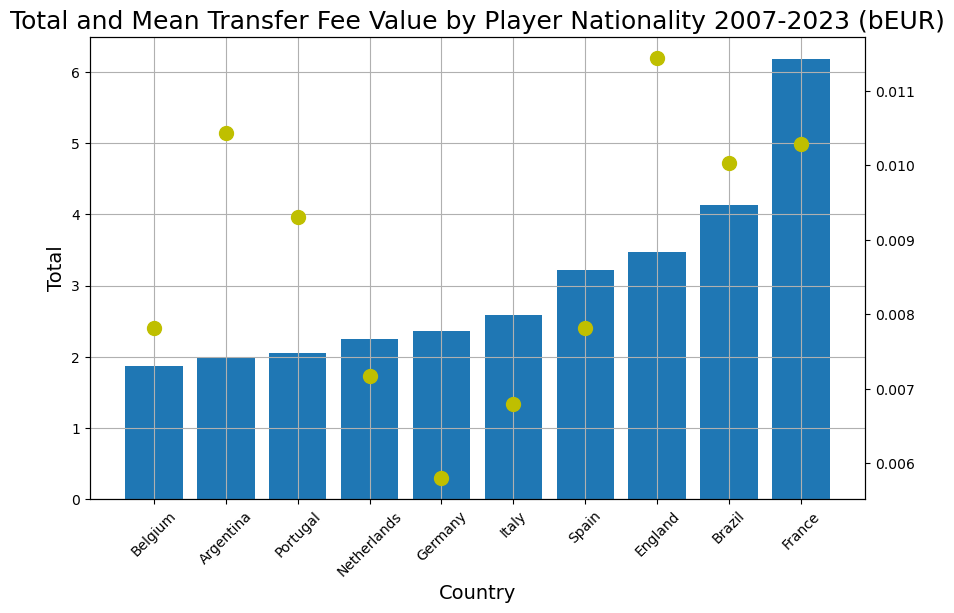

In [539]:
#

transfers = transfers.dropna(subset = ["transfer_fee"])

transfers = transfers[transfers['transfer_fee'] != 0]

transfers["transfer_date"] = pd.to_datetime(transfers['transfer_date'])

transfers["year"] = transfers["transfer_date"].dt.year

transfers = transfers[(transfers["year"] > 2006) & (transfers["year"] < 2024)]

merged = pd.merge(players,transfers, on = "player_id", how = "right")

#
merged=merged[~merged.from_club_name.str.contains('U1')]
merged=merged[~merged.from_club_name.str.contains('youth')]
merged=merged[~merged.from_club_name.str.contains('Youth')]
merged=merged[~merged.from_club_name.str.contains('Jgd')]
merged=merged[~merged.from_club_name.str.contains('U2')]
merged=merged[~merged.from_club_name.str.contains('II')]
merged=merged[~merged.from_club_name.str.contains('Yth')]
merged=merged[~merged.from_club_name.str.contains('Y.')]
merged=merged[~merged.from_club_name.str.contains('S1')]
merged=merged[~merged.from_club_name.str.contains('S2')]

# 
transfers_country_ranking = merged.groupby("country_of_birth")["transfer_fee"].agg(
    transfer_sum = 'sum', transfer_mean = 'mean').reset_index()

transfers_country_ranking = transfers_country_ranking.nlargest(10, 'transfer_sum')

transfers_country_ranking = transfers_country_ranking.sort_values(
    "transfer_sum", ascending = True)

#print(transfers_country_ranking_sum)

transfers_country_ranking["transfer_sum"] = transfers_country_ranking[
    "transfer_sum"] / 1000000000

transfers_country_ranking["transfer_mean"] = transfers_country_ranking[
    "transfer_mean"] / 1000000000

fig, ax1 = plt.subplots(figsize=(10, 6))  # Set the figure size here
ax1.bar(transfers_country_ranking['country_of_birth'], transfers_country_ranking['transfer_sum'],
        linewidth=2.5)  # Use color for a simple color setting
ax1.set_title('Total and Mean Transfer Fee Value by Player Nationality 2007-2023 (bEUR)', fontsize=18)
ax1.set_xlabel('Country', fontsize=14)
ax1.set_ylabel('Total', fontsize=14)
ax1.grid(True)

# Correct the method for rotating x-ticks
ax1.set_xticklabels(transfers_country_ranking['country_of_birth'], rotation=45)

# Create the second axes object for the mean values plot
ax2 = ax1.twinx()
ax2.scatter(transfers_country_ranking['country_of_birth'], transfers_country_ranking[
    'transfer_mean'], s=100,c="y")
#ax2.set_ylim([0, 500000])


C:\Users\jonat\AppData\Local\Temp\ipykernel_18760\1026081406.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(transfers_club_ranking['to_club_name'], rotation=90)
C:\Users\jonat\AppData\Local\Temp\ipykernel_18760\1026081406.py:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(england['to_club_name'], rotation=90)
C:\Users\jonat\AppData\Local\Temp\ipykernel_18760\1026081406.py:88: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax5.set_xticklabels(france['to_club_name'], rotation=90)
C:\Users\jonat\AppData\Local\Temp\ipykernel_18760\1026081406.py:103: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax7.set_xticklabels(spain['to_club_name'], rotation=90)
C:\Users\jonat\AppData\Local\Temp\ipykernel_18760\1026081406.py:118: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax9.set_xticklabels(germany['

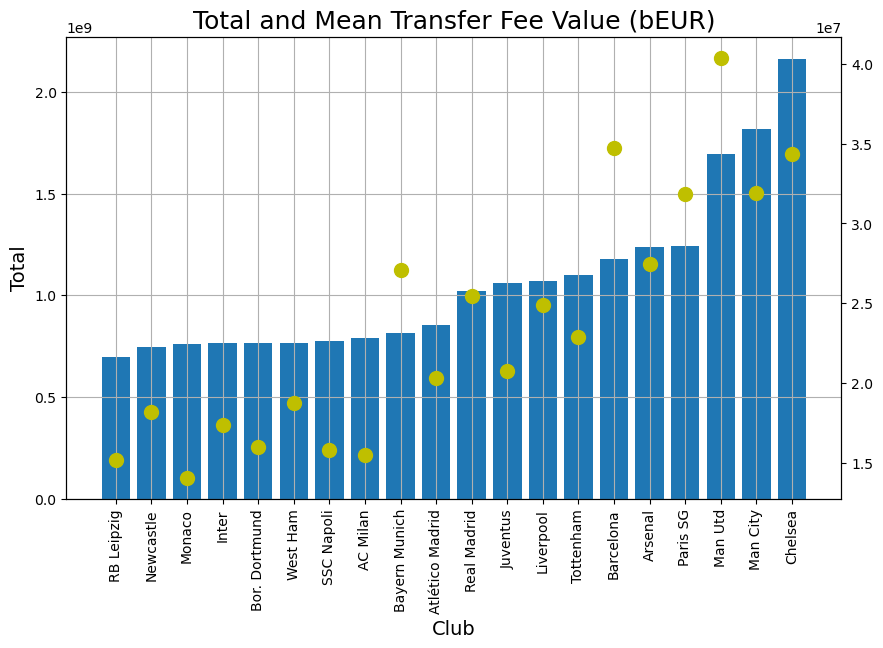

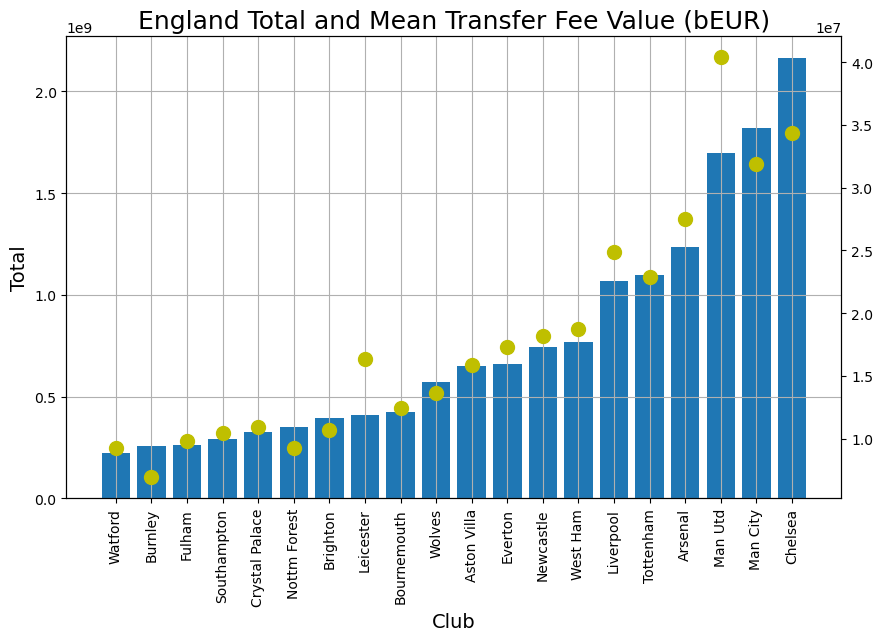

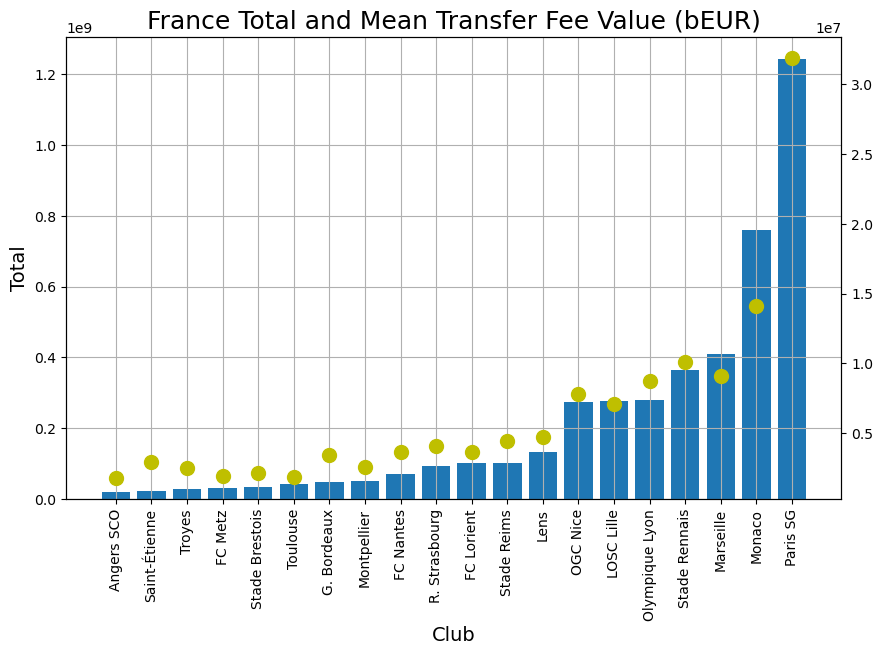

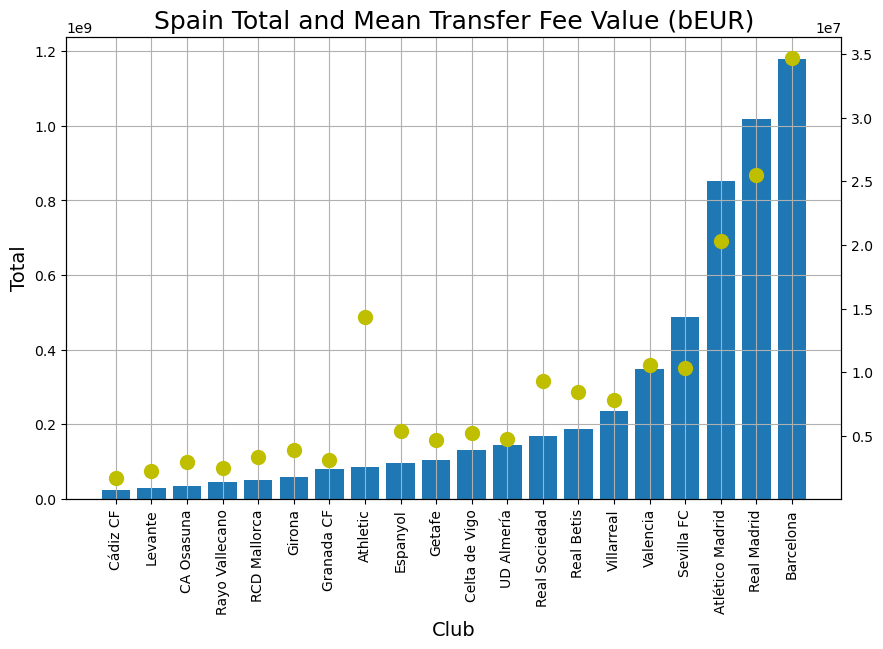

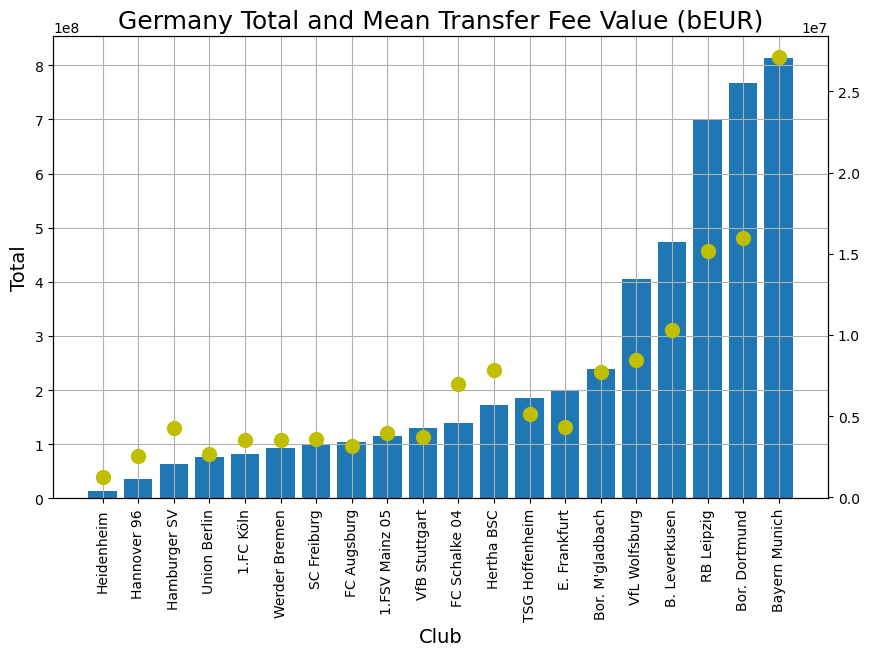

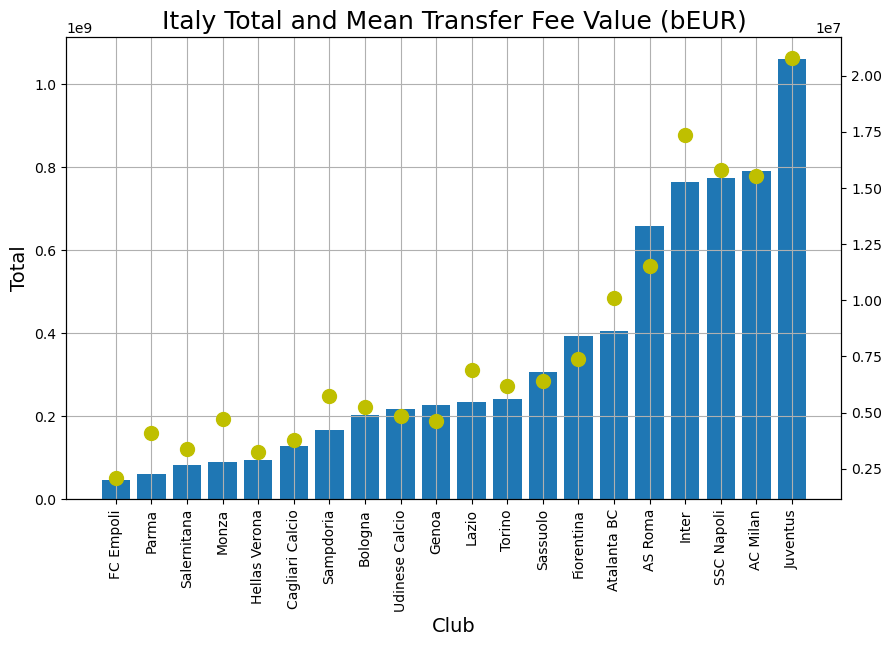

In [579]:
# Clubs

# Match club with country code
clubs["to_club_id"] = clubs["club_id"]

transfers_club_ranking = pd.merge(merged, clubs, how = 'left', on = 'to_club_id')

def transfers_country(league_id):
    
    df = transfers_club_ranking[transfers_club_ranking["domestic_competition_id"] == league_id]
    
    df = df.groupby("to_club_name")["transfer_fee"].agg(
        transfer_sum = 'sum', transfer_mean = 'mean').reset_index()
    
    df = df.nlargest(20, 'transfer_sum')
    
    df = df.sort_values("transfer_sum", ascending = True)
    
    return df

italy=transfers_country("IT1")
nl=transfers_country("NL1")
spain=transfers_country("ES1")
england=transfers_country("GB1")
belgium=transfers_country("BE1")
france=transfers_country("FR1")
portugal=transfers_country("PO1")
germany=transfers_country("L1")

england.to_csv("england.csv")
pl_teams = england["to_club_name"].to_list()

transfers_club_ranking_pl=transfers_club_ranking

transfers_club_ranking_pl.to_csv("transfers_club_ranking_pl.csv")

transfers_club_ranking = merged.groupby("to_club_name")["transfer_fee"].agg(
    transfer_sum = 'sum', transfer_mean = 'mean').reset_index()

transfers_club_ranking = transfers_club_ranking.nlargest(20, 'transfer_sum')

clubs_top_spending = transfers_club_ranking["to_club_name"].to_list()

transfers_club_ranking = transfers_club_ranking.sort_values(
    "transfer_sum", ascending = True)

fig, ax1 = plt.subplots(figsize=(10, 6))  # Set the figure size here
ax1.bar(transfers_club_ranking['to_club_name'], transfers_club_ranking['transfer_sum'],
        linewidth=2.5)  # Use color for a simple color setting
ax1.set_title('Total and Mean Transfer Fee Value (bEUR)', fontsize=18)
ax1.set_xlabel('Club', fontsize=14)
ax1.set_ylabel('Total', fontsize=14)
ax1.grid(True)

# Correct the method for rotating x-ticks
ax1.set_xticklabels(transfers_club_ranking['to_club_name'], rotation=90)

# Create the second axes object for the mean values plot
ax2 = ax1.twinx()
ax2.scatter(transfers_club_ranking['to_club_name'], transfers_club_ranking[
    'transfer_mean'], s=100,c="y")

#england
fig, ax3 = plt.subplots(figsize=(10, 6))  # Set the figure size here
ax3.bar(england['to_club_name'], england['transfer_sum'],linewidth=2.5)
ax3.set_title('England Total and Mean Transfer Fee Value (bEUR)', fontsize=18)
ax3.set_xlabel('Club', fontsize=14)
ax3.set_ylabel('Total', fontsize=14)
ax3.grid(True)

# Correct the method for rotating x-ticks
ax3.set_xticklabels(england['to_club_name'], rotation=90)

# Create the second axes object for the mean values plot
ax4 = ax3.twinx()
ax4.scatter(england['to_club_name'], england['transfer_mean'],s=100,c="y")

#france
fig, ax5 = plt.subplots(figsize=(10, 6))  # Set the figure size here
ax5.bar(france['to_club_name'], france['transfer_sum'],linewidth=2.5)
ax5.set_title('France Total and Mean Transfer Fee Value (bEUR)', fontsize=18)
ax5.set_xlabel('Club', fontsize=14)
ax5.set_ylabel('Total', fontsize=14)
ax5.grid(True)

# Correct the method for rotating x-ticks
ax5.set_xticklabels(france['to_club_name'], rotation=90)

# Create the second axes object for the mean values plot
ax6 = ax5.twinx()
ax6.scatter(france['to_club_name'], france['transfer_mean'],s=100,c="y")

#spain
fig, ax7 = plt.subplots(figsize=(10, 6))  # Set the figure size here
ax7.bar(spain['to_club_name'], spain['transfer_sum'],linewidth=2.5)
ax7.set_title('Spain Total and Mean Transfer Fee Value (bEUR)', fontsize=18)
ax7.set_xlabel('Club', fontsize=14)
ax7.set_ylabel('Total', fontsize=14)
ax7.grid(True)

# Correct the method for rotating x-ticks
ax7.set_xticklabels(spain['to_club_name'], rotation=90)

# Create the second axes object for the mean values plot
ax8 = ax7.twinx()
ax8.scatter(spain['to_club_name'], spain['transfer_mean'],s=100,c="y")

#germany
fig, ax9 = plt.subplots(figsize=(10, 6))  # Set the figure size here
ax9.bar(germany['to_club_name'], germany['transfer_sum'],linewidth=2.5)
ax9.set_title('Germany Total and Mean Transfer Fee Value (bEUR)', fontsize=18)
ax9.set_xlabel('Club', fontsize=14)
ax9.set_ylabel('Total', fontsize=14)
ax9.grid(True)

# Correct the method for rotating x-ticks
ax9.set_xticklabels(germany['to_club_name'], rotation=90)

# Create the second axes object for the mean values plot
ax10 = ax9.twinx()
ax10.scatter(germany['to_club_name'], germany['transfer_mean'],s=100,c="y")

#italy
fig, ax11 = plt.subplots(figsize=(10, 6))  # Set the figure size here
ax11.bar(italy['to_club_name'], italy['transfer_sum'],linewidth=2.5)
ax11.set_title('Italy Total and Mean Transfer Fee Value (bEUR)', fontsize=18)
ax11.set_xlabel('Club', fontsize=14)
ax11.set_ylabel('Total', fontsize=14)
ax11.grid(True)

# Correct the method for rotating x-ticks
ax11.set_xticklabels(italy['to_club_name'], rotation=90)

# Create the second axes object for the mean values plot
ax12 = ax11.twinx()
ax12.scatter(italy['to_club_name'], italy['transfer_mean'],s=100,c="y")


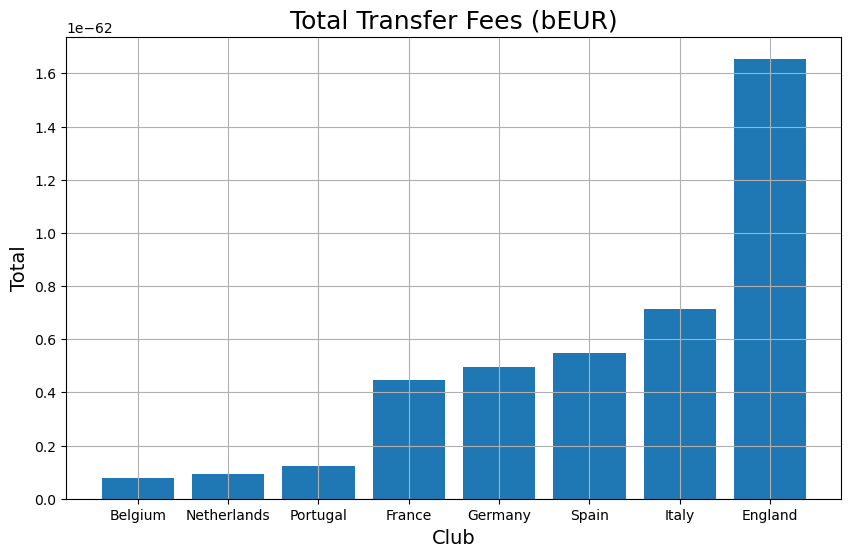

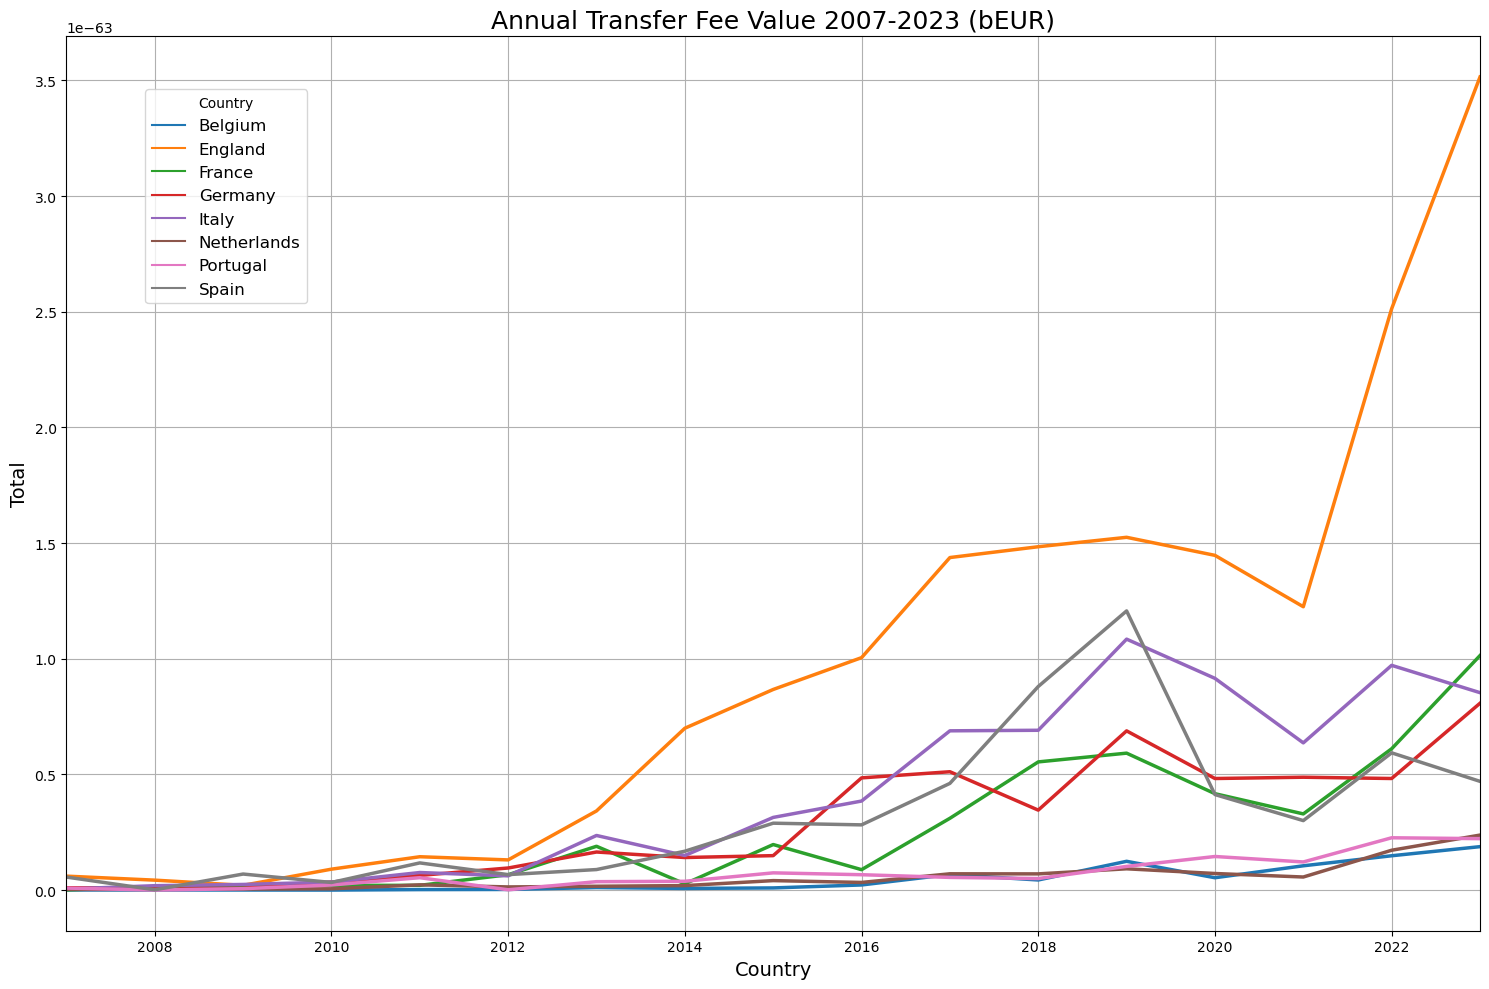

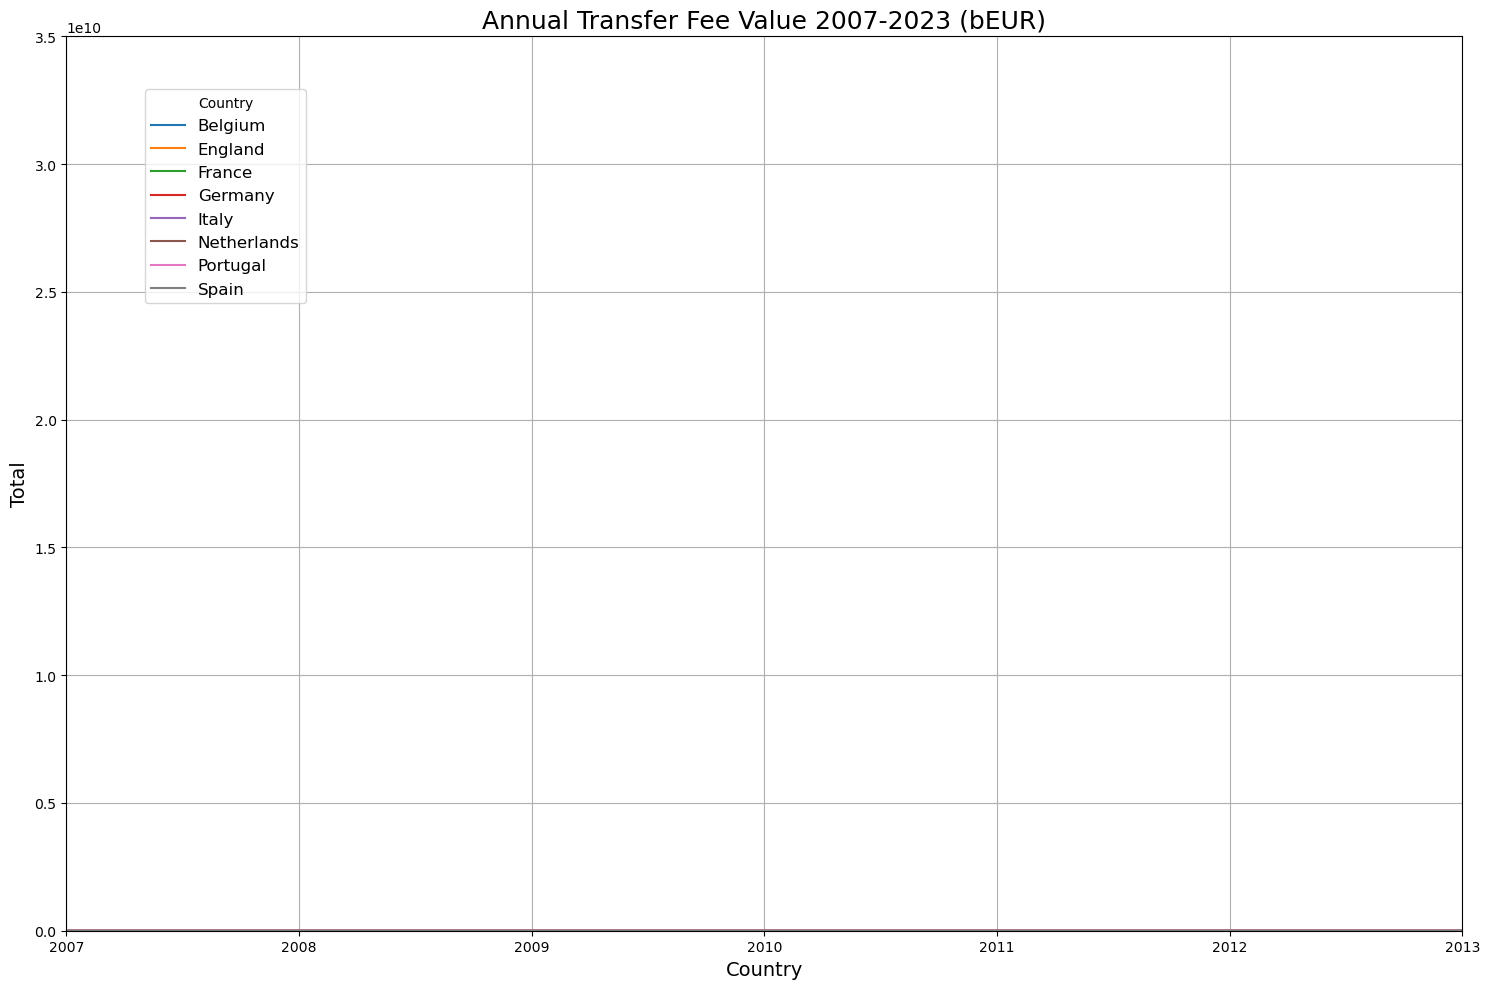

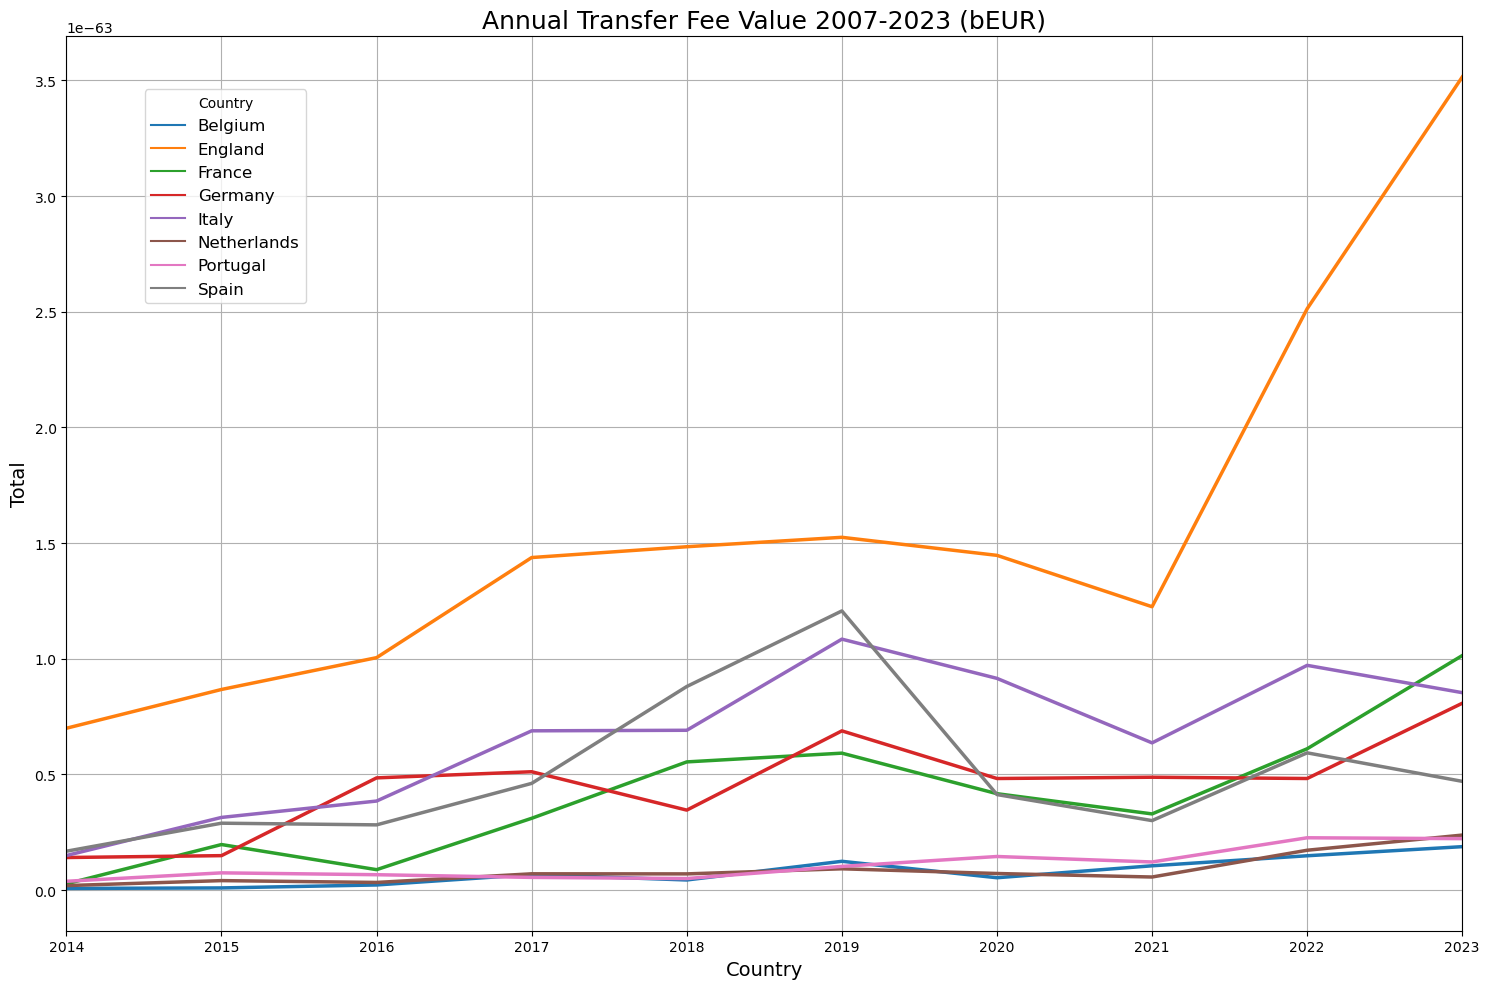

In [592]:
##            

transfers_club_ranking = pd.read_csv("transfers_club_ranking.csv")

transfers_club_ranking["domestic_competition_id"] = transfers_club_ranking[
    "domestic_competition_id"].replace({
    "IT1": "Italy",
    "NL1": "Netherlands",
    "ES1": "Spain",
    "GB1": "England",
    "BE1": "Belgium",
    "FR1": "France",
    "PO1": "Portugal",
    "L1": "Germany"
})

transfers_club_ranking = transfers_club_ranking.groupby(["year","domestic_competition_id"])[
    "transfer_fee"].sum().reset_index()

countries = ["France", "England", "Spain", "Italy", "Germany", "Netherlands", "Belgium", "Portugal"]

transfers_club_ranking = transfers_club_ranking[transfers_club_ranking[
    "domestic_competition_id"].isin(countries)]

transfers_club_ranking["transfer_fee"] = transfers_club_ranking[
    "transfer_fee"] / 1000000000

transfers_club_ranking.to_csv("transfers_club_ranking.csv")

transfers_club_ranking_bar = transfers_club_ranking.groupby(["domestic_competition_id"])[
    "transfer_fee"].sum().reset_index()

transfers_club_ranking_bar = transfers_club_ranking_bar.sort_values("transfer_fee", ascending=True)

#Total barchart
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.bar(transfers_club_ranking_bar['domestic_competition_id'], transfers_club_ranking_bar[
    'transfer_fee'],linewidth=2.5)
ax1.set_title('Total Transfer Fees (bEUR)', fontsize=18)
ax1.set_xlabel('Club', fontsize=14)
ax1.set_ylabel('Total', fontsize=14)
ax1.grid(True)
plt.show()
plt.close()

#2007-23
plt.figure(figsize=(15, 10))
sns.lineplot(data=transfers_club_ranking, x='year', y='transfer_fee',hue="domestic_competition_id", 
             linewidth=2.5, palette='tab10')
plt.title('Annual Transfer Fee Value 2007-2023 (bEUR)', fontsize=18)
plt.xlabel('Country', fontsize=14)
plt.xlim(2007,2023)
plt.ylabel('Total', fontsize=14)
plt.legend(title='Country', loc='upper left', bbox_to_anchor=(0.05, 0.95), fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()
plt.close()

#2007-13
plt.figure(figsize=(15, 10))
sns.lineplot(data=transfers_club_ranking, x='year', y='transfer_fee',hue="domestic_competition_id",
             linewidth=2.5, palette='tab10')
plt.title('Annual Transfer Fee Value 2007-2023 (bEUR)', fontsize=18)
plt.xlabel('Country', fontsize=14)
plt.xlim(2007,2013)
plt.ylim(0,35000000000)
plt.ylabel('Total', fontsize=14)
plt.legend(title='Country', loc='upper left', bbox_to_anchor=(0.05, 0.95), fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()
plt.close()

#2007-13
plt.figure(figsize=(15, 10))
sns.lineplot(data=transfers_club_ranking, x='year', y='transfer_fee',hue="domestic_competition_id", 
             linewidth=2.5, palette='tab10')
plt.title('Annual Transfer Fee Value 2007-2023 (bEUR)', fontsize=18)
plt.xlabel('Country', fontsize=14)
plt.xlim(2014,2023)
plt.ylabel('Total', fontsize=14)
plt.legend(title='Country', loc='upper left', bbox_to_anchor=(0.05, 0.95), fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()
plt.close()


Text(0.5, 1.0, 'Transfer Fee')

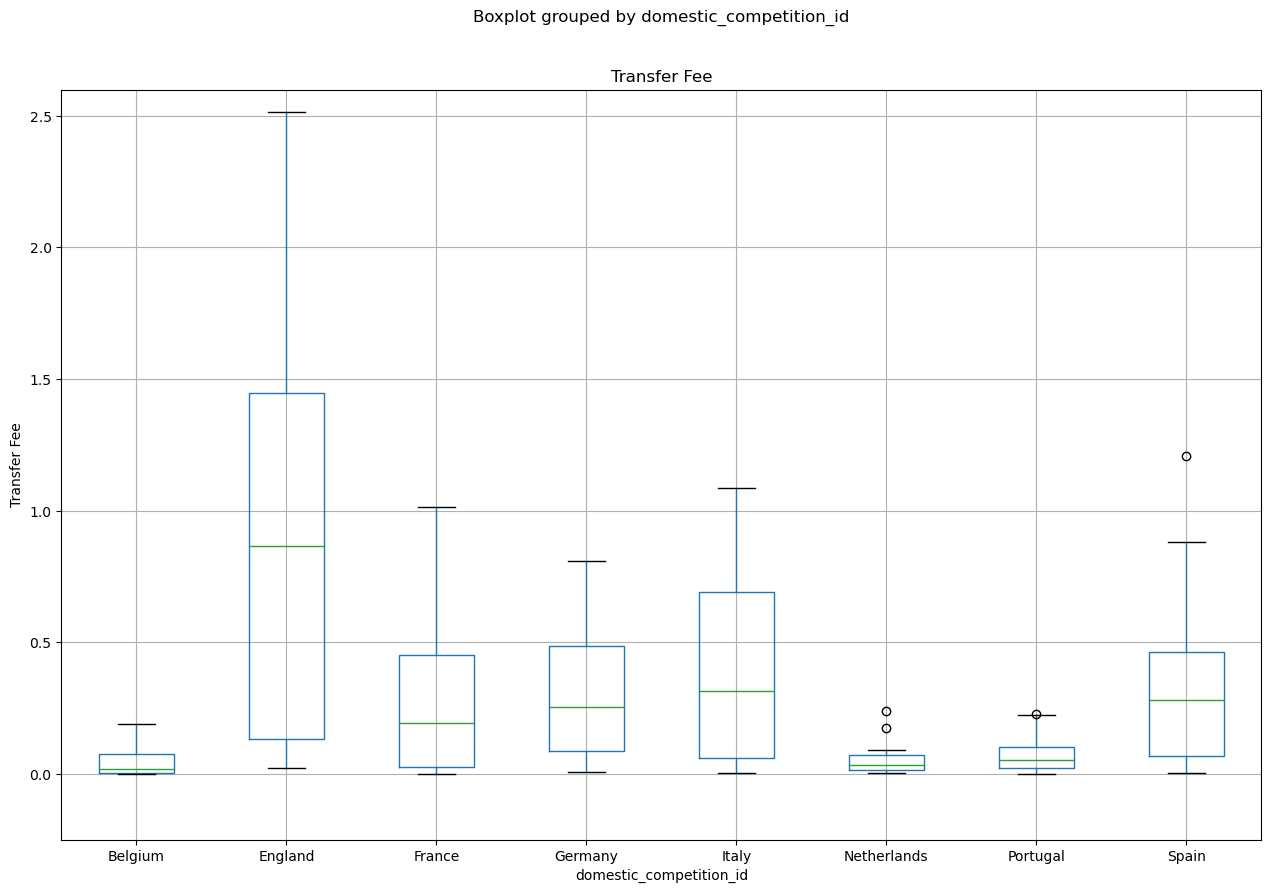

In [575]:
# Boxplot

transfers_club_ranking = pd.read_csv("transfers_club_ranking.csv")

transfers_club_ranking_box=transfers_club_ranking

#2004-23
ax=transfers_club_ranking_box.boxplot(
    column='transfer_fee',by='domestic_competition_id',figsize=(15,10))
ax.set_ylim((-0.25,2.6))
ax.set_ylabel('Transfer Fee')
ax.set_title('Transfer Fee')


     country_of_birth  transfer_fee
0              France     2000000.0
1              Israel      850000.0
2             Senegal      600000.0
3           Venezuela     1800000.0
4             Germany     2300000.0
...               ...           ...
7198          England    13200000.0
7200           Brazil      600000.0
7201           Brazil     2000000.0
7202        Argentina      800000.0
7203            UdSSR      250000.0

[6710 rows x 2 columns]


Text(0.5, 1.0, 'Transfer Fee')

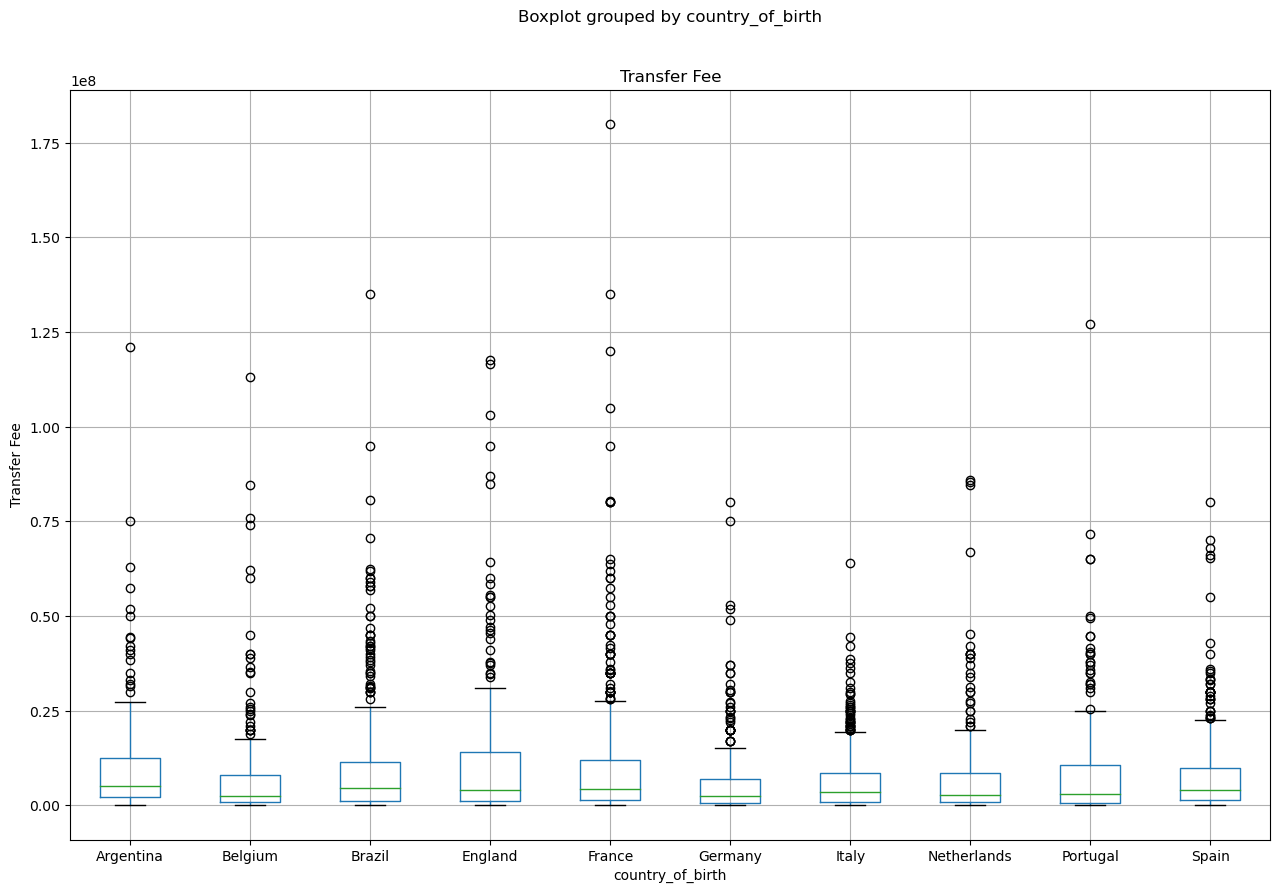

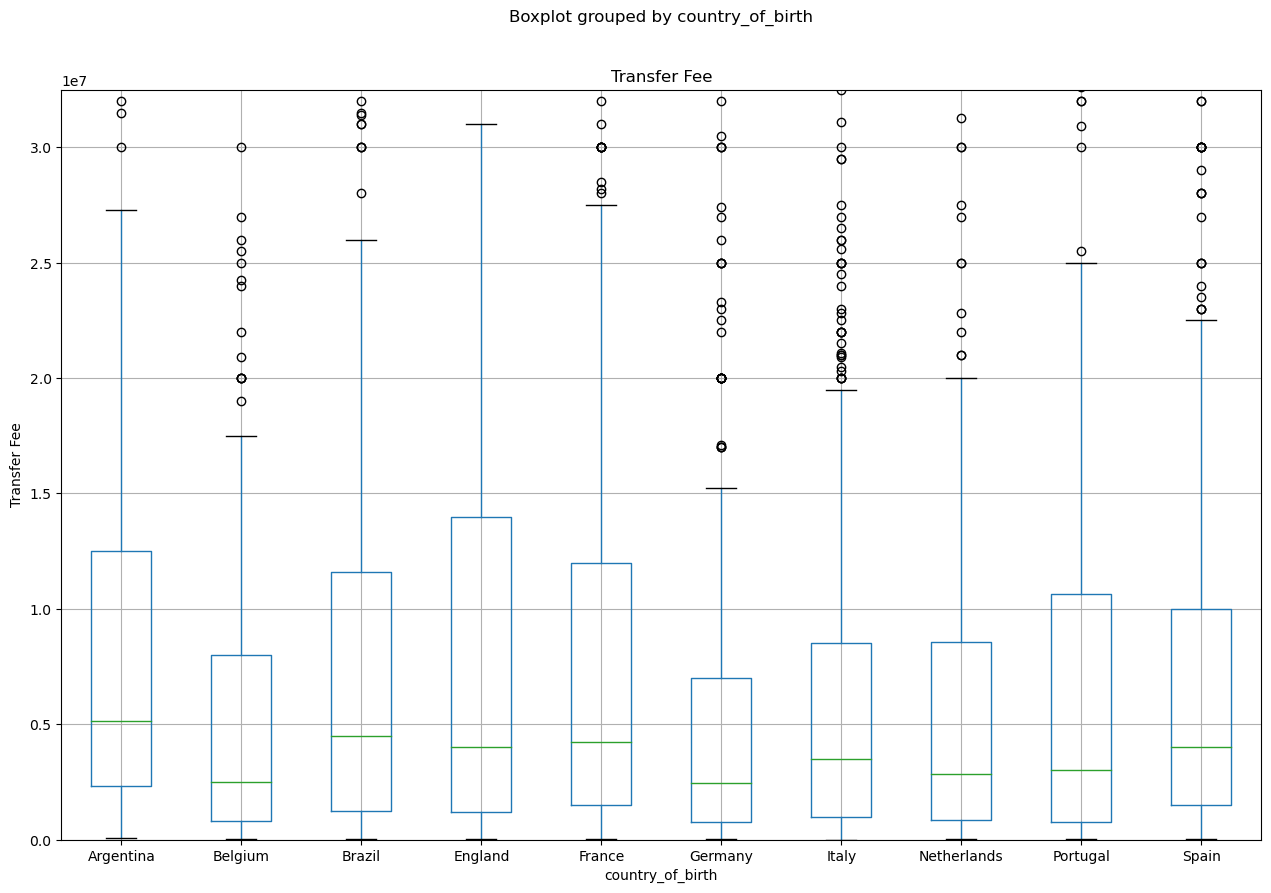

In [342]:
# Boxplot

transfers_boxplot = merged

to_keep = ["country_of_birth", "transfer_fee"]

transfers_boxplot = transfers_boxplot[to_keep]

countries = ["France", "Brazil", "England", "Spain", "Italy", "Germany", "Netherlands", "Argentina",
            "Belgium", "Portugal"]

transfers_boxplot = transfers_boxplot[transfers_boxplot["country_of_birth"].isin(countries)]

#2004-23
ax=transfers_boxplot.boxplot(column='transfer_fee',by='country_of_birth',figsize=(15,10))
ax.set_ylabel('Transfer Fee')
ax.set_title('Transfer Fee')

ax=transfers_boxplot.boxplot(column='transfer_fee',by='country_of_birth',figsize=(15,10))
ax.set_ylim((0,32500000))
ax.set_ylabel('Transfer Fee')
ax.set_title('Transfer Fee')


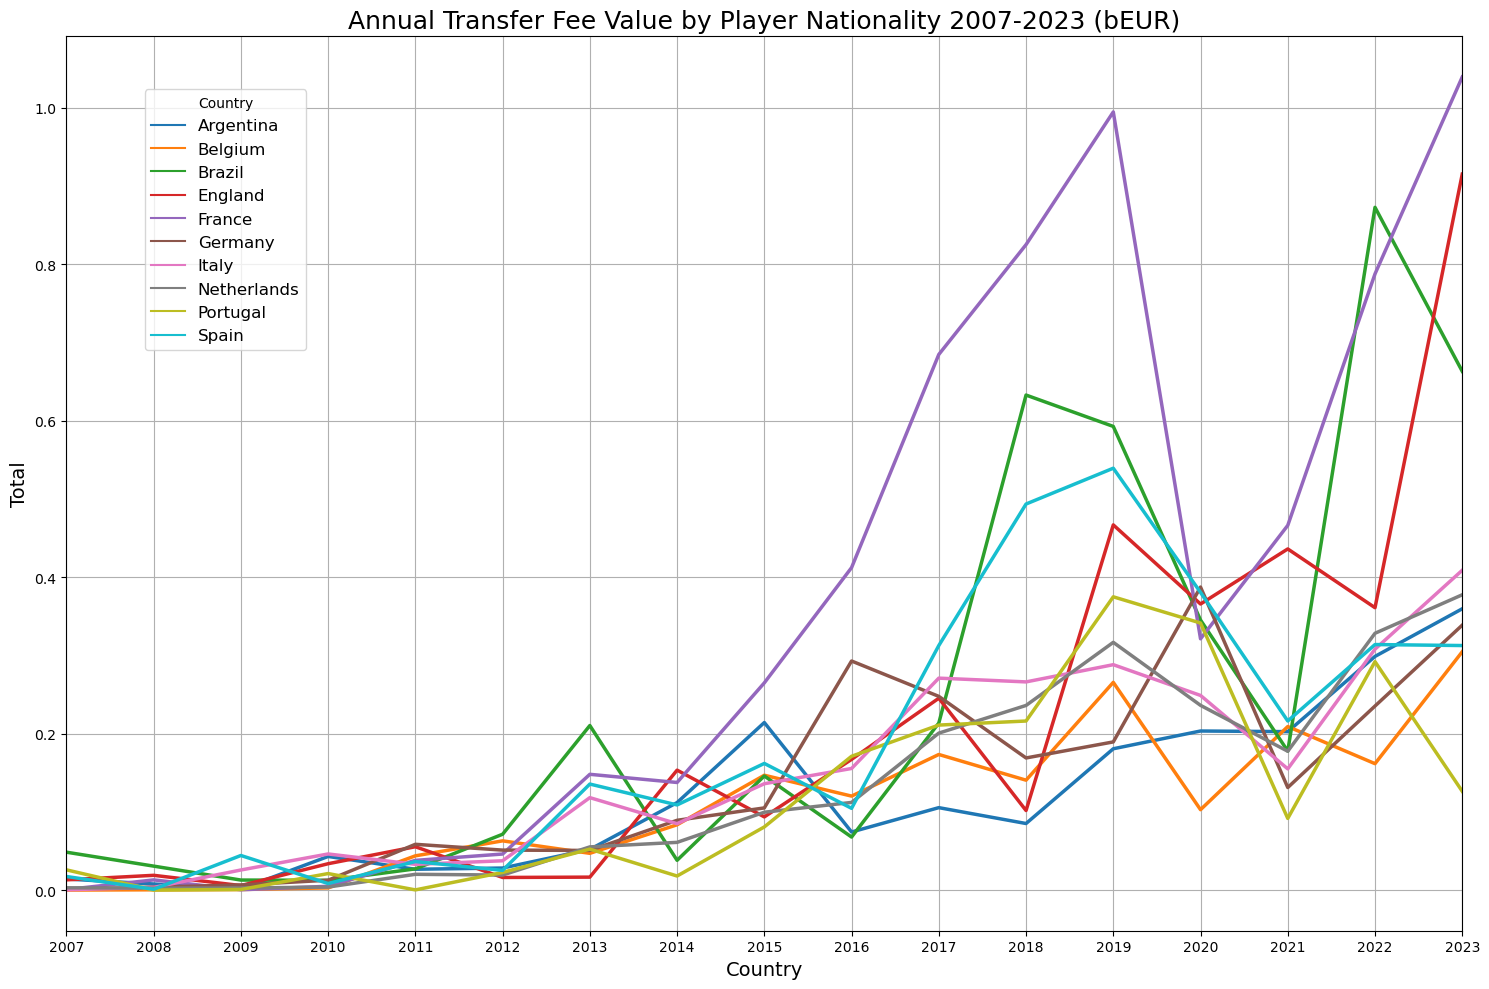

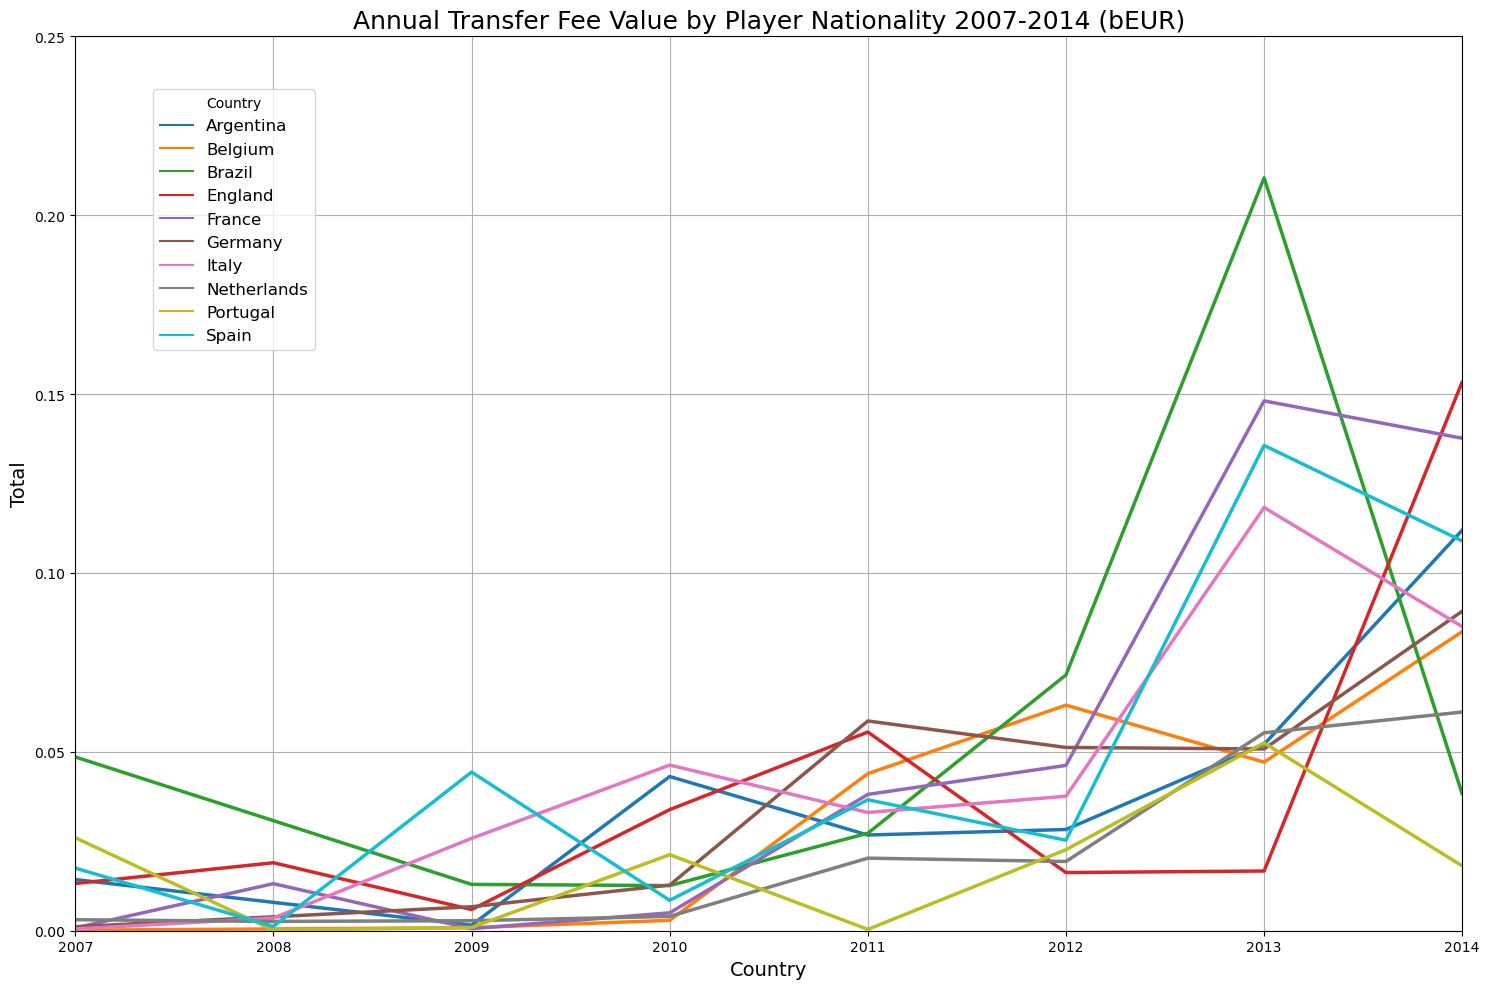

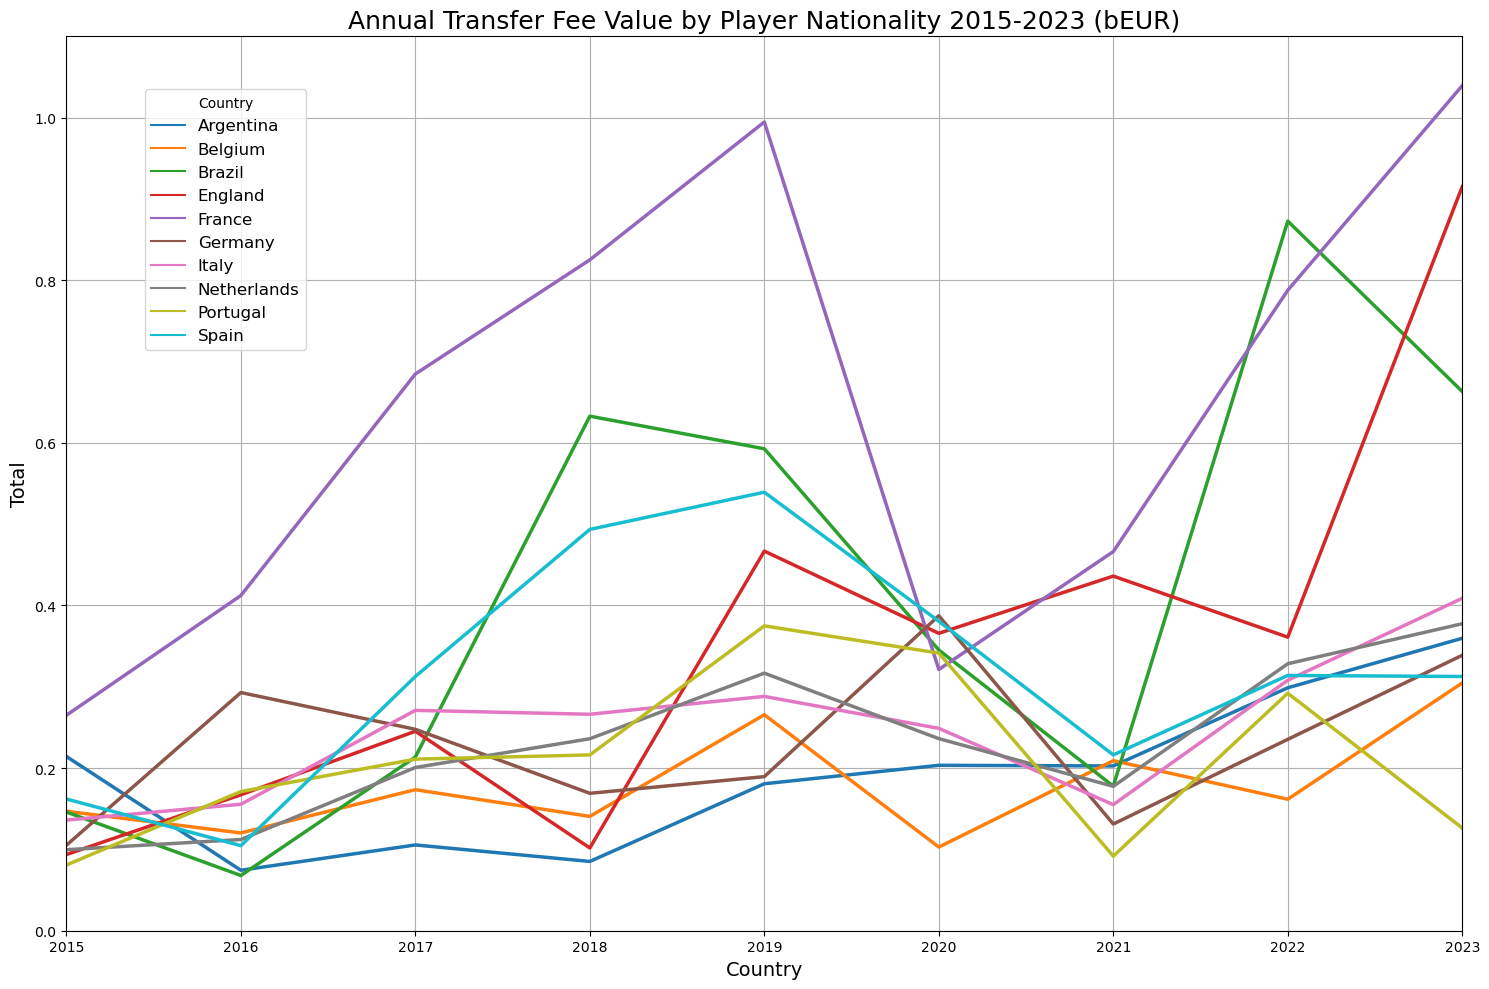

In [537]:
#

transfers_country_line = merged.groupby(["year","country_of_birth"])[
    "transfer_fee"].sum().reset_index()

top_20_countries = transfers_country_ranking["country_of_birth"].to_list()

transfers_country_line = transfers_country_line[transfers_country_line["country_of_birth"].isin(
    top_20_countries)]

transfers_country_line["transfer_fee"] = transfers_country_line[
    "transfer_fee"] / 1000000000

transfers_country_line["year"] = np.array(transfers_country_line["year"]).astype(str)

#2004-23
plt.figure(figsize=(15, 10))
sns.lineplot(data=transfers_country_line, x='year', y='transfer_fee',hue="country_of_birth", 
             linewidth=2.5, palette='tab10')
plt.title('Annual Transfer Fee Value by Player Nationality 2007-2023 (bEUR)', fontsize=18)
plt.xlabel('Country', fontsize=14)
plt.xlim("2007","2023")
plt.ylabel('Total', fontsize=14)
plt.legend(title='Country', loc='upper left', bbox_to_anchor=(0.05, 0.95), fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()
plt.close()

#2004-14
plt.figure(figsize=(15, 10))
sns.lineplot(data=transfers_country_line, x='year', y='transfer_fee',hue="country_of_birth", 
             linewidth=2.5, palette='tab10')
plt.title('Annual Transfer Fee Value by Player Nationality 2007-2014 (bEUR)', fontsize=18)
plt.xlabel('Country', fontsize=14)
plt.xlim("2007","2014")
plt.ylim(0,0.25)
plt.ylabel('Total', fontsize=14)
plt.legend(title='Country', loc='upper left', bbox_to_anchor=(0.05, 0.95), fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()
plt.close()

#2015-23
plt.figure(figsize=(15, 10))
sns.lineplot(data=transfers_country_line, x='year', y='transfer_fee',hue="country_of_birth", 
             linewidth=2.5, palette='tab10')
plt.title('Annual Transfer Fee Value by Player Nationality 2015-2023 (bEUR)', fontsize=18)
plt.xlabel('Country', fontsize=14)
plt.xlim("2015","2023")
plt.ylim(0,1.1)
plt.ylabel('Total', fontsize=14)
plt.legend(title='Country', loc='upper left', bbox_to_anchor=(0.05, 0.95), fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()
plt.close()


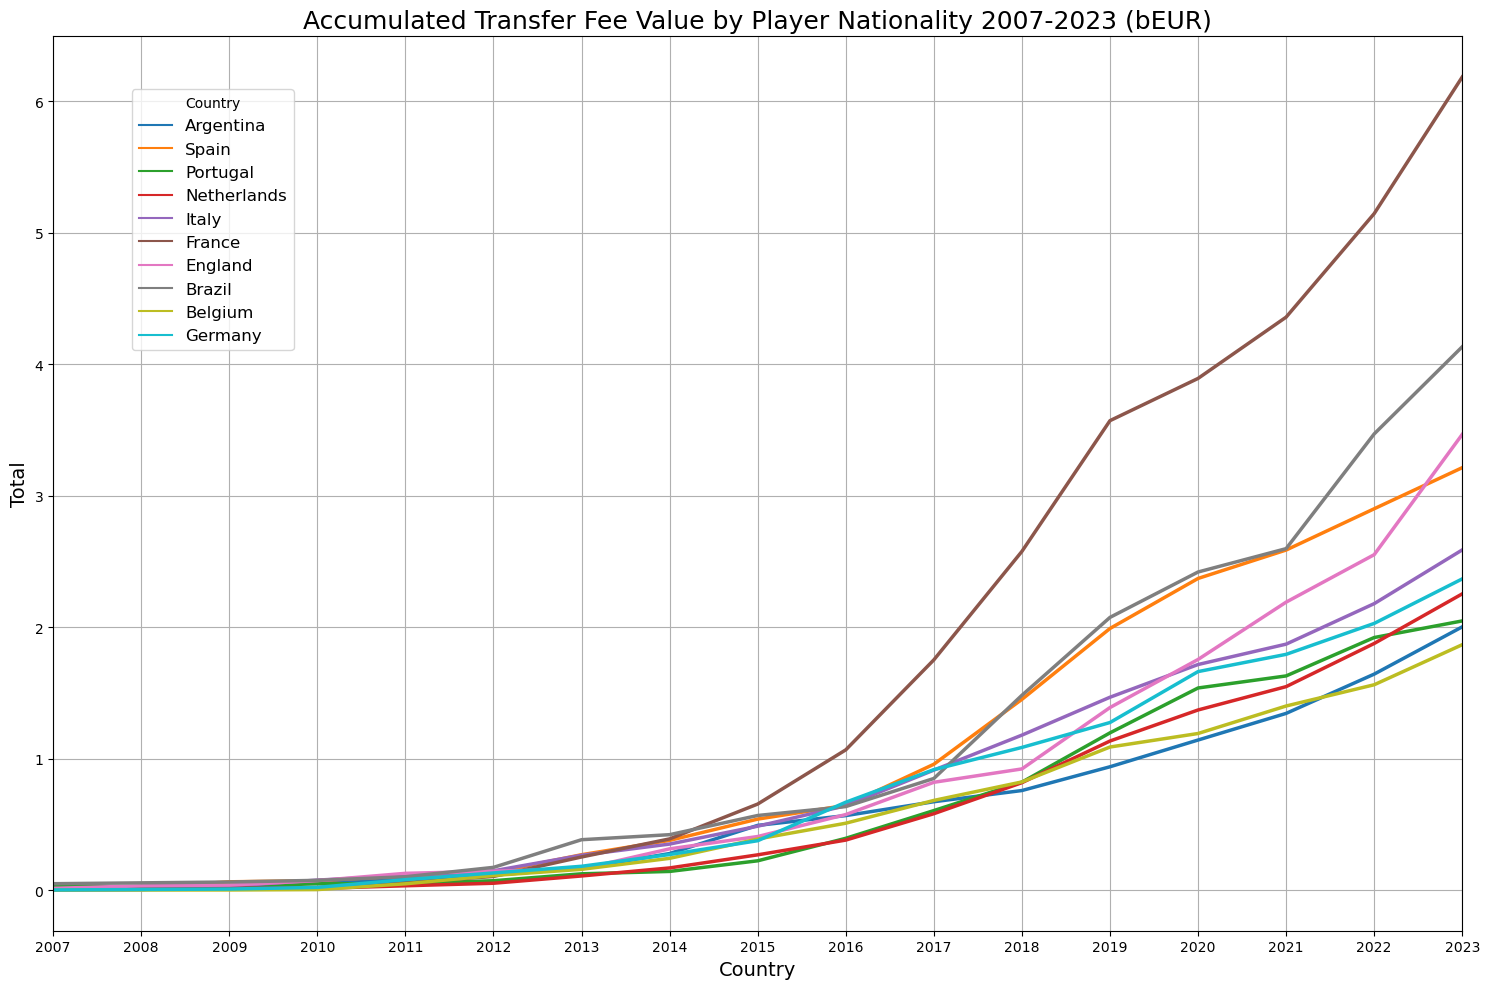

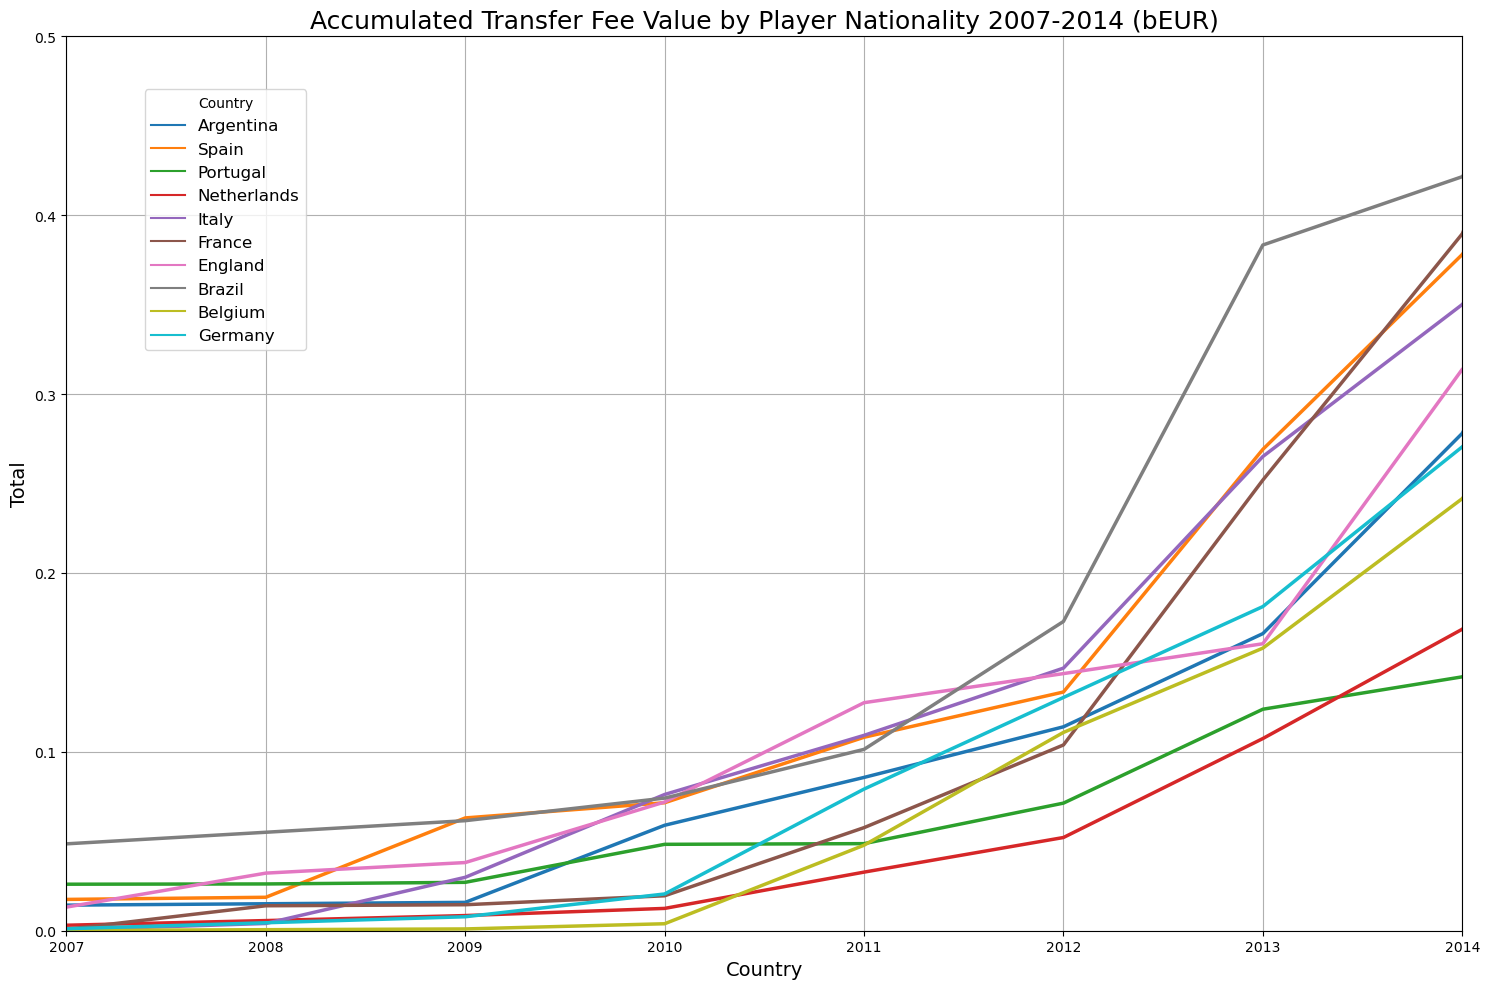

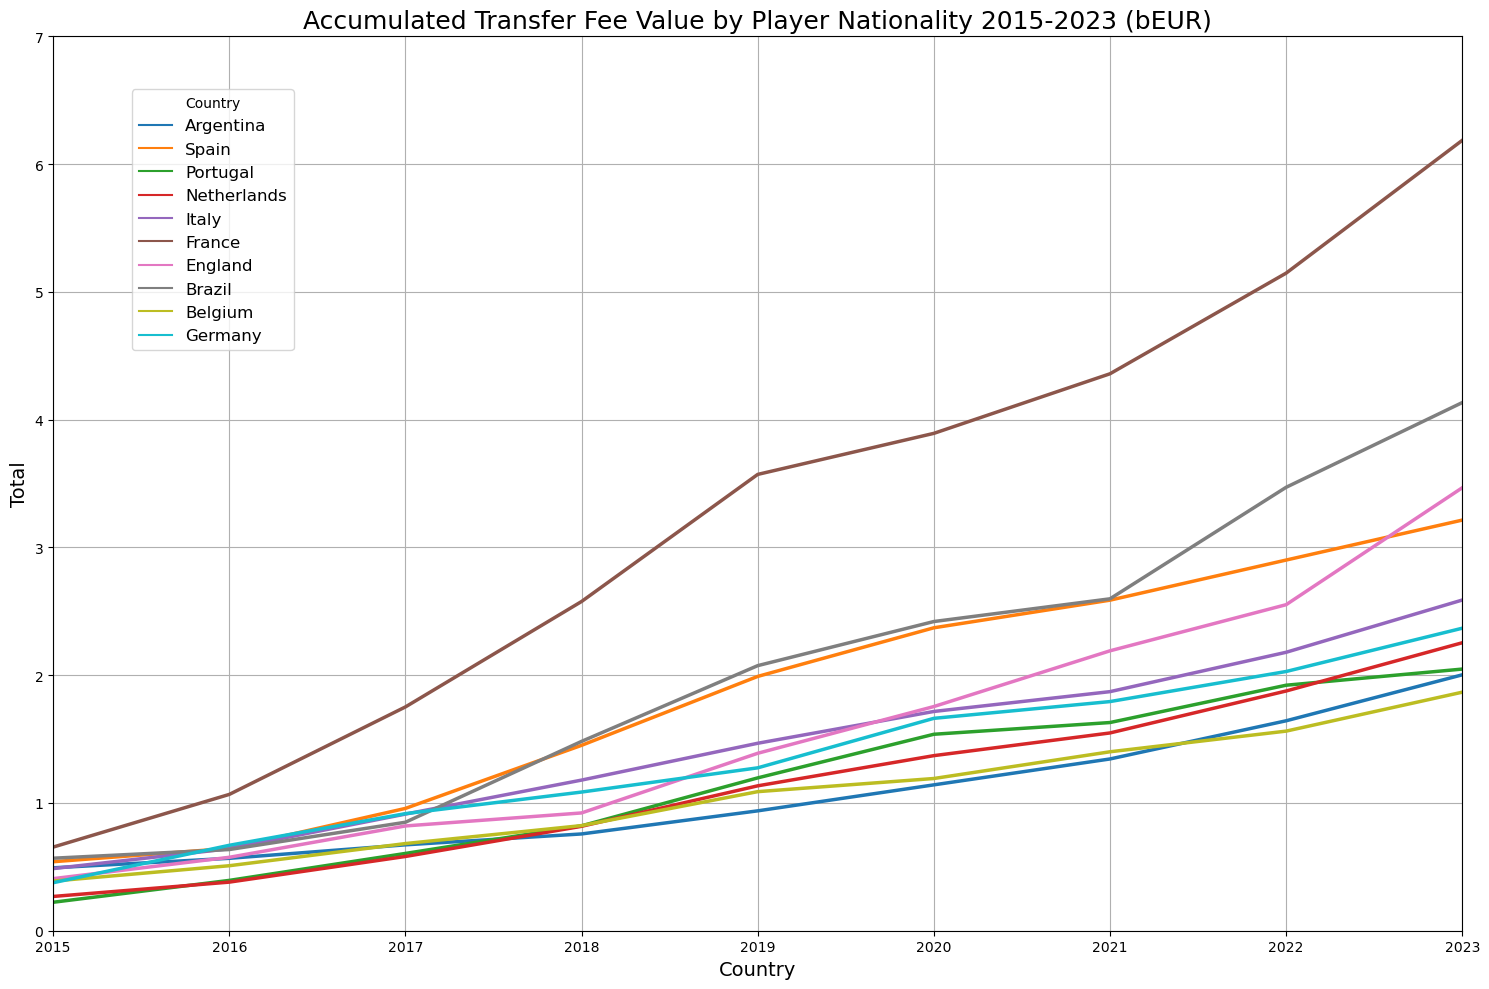

In [538]:

transfers_country_line_accum = transfers_country_line
#print(transfers_country_line_accum)

transfers_country_line_accum = transfers_country_line_accum.groupby(["country_of_birth", "year"]).agg(
    transfer_fee = ("transfer_fee", "sum")).reset_index()

transfers_country_line_accum = transfers_country_line_accum.groupby([
    "country_of_birth", "year"]).sum().groupby(level = 0).cumsum().reset_index()

transfers_country_line_accum = transfers_country_line_accum.sort_values("year", ascending = True)

#2004-23
plt.figure(figsize=(15, 10))
sns.lineplot(data=transfers_country_line_accum, x='year', y='transfer_fee',hue="country_of_birth", 
             linewidth=2.5, palette='tab10')
plt.title('Accumulated Transfer Fee Value by Player Nationality 2007-2023 (bEUR)', fontsize=18)
plt.xlabel('Country', fontsize=14)
plt.xlim("2007","2023")
#plt.ylim(0,4)
plt.ylabel('Total', fontsize=14)
plt.legend(title='Country', loc='upper left', bbox_to_anchor=(0.05, 0.95), fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()
plt.close()

#2004-14
plt.figure(figsize=(15, 10))
sns.lineplot(data=transfers_country_line_accum, x='year', y='transfer_fee',hue="country_of_birth", 
             linewidth=2.5, palette='tab10')
plt.title('Accumulated Transfer Fee Value by Player Nationality 2007-2014 (bEUR)', fontsize=18)
plt.xlabel('Country', fontsize=14)
plt.xlim("2007","2014")
plt.ylim(0,0.5)
plt.ylabel('Total', fontsize=14)
plt.legend(title='Country', loc='upper left', bbox_to_anchor=(0.05, 0.95), fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()
plt.close()

#2015-23
plt.figure(figsize=(15, 10))
sns.lineplot(data=transfers_country_line_accum, x='year', y='transfer_fee',hue="country_of_birth", 
             linewidth=2.5, palette='tab10')
plt.title('Accumulated Transfer Fee Value by Player Nationality 2015-2023 (bEUR)', fontsize=18)
plt.xlabel('Country', fontsize=14)
plt.xlim("2015","2023")
plt.ylim(0,7)
plt.ylabel('Total', fontsize=14)
plt.legend(title='Country', loc='upper left', bbox_to_anchor=(0.05, 0.95), fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()
plt.close()


      player_id               name  last_season  current_club_id  \
0        947360   Kassoum Ouattara       2023.0            162.0   
2        364234    Pape Abou Cissé       2023.0           3840.0   
4        422203         Umut Güneş       2023.0          11282.0   
9        703497            Bitello       2023.0            121.0   
10       574930  Danila Vedernikov       2023.0          49702.0   
...         ...                ...          ...              ...   
7185      32467       Ivan Rakitic       2023.0            368.0   
7186      34601        Raúl García       2023.0            621.0   
7198      14086       Ashley Young       2023.0             29.0   
7200      16136              Dante       2023.0            417.0   
7201      29241       Thiago Silva       2023.0            631.0   

            player_code country_of_birth country_of_citizenship date_of_birth  \
0      kassoum-ouattara           France                 France    2004-10-14   
2       pape-abou-cis

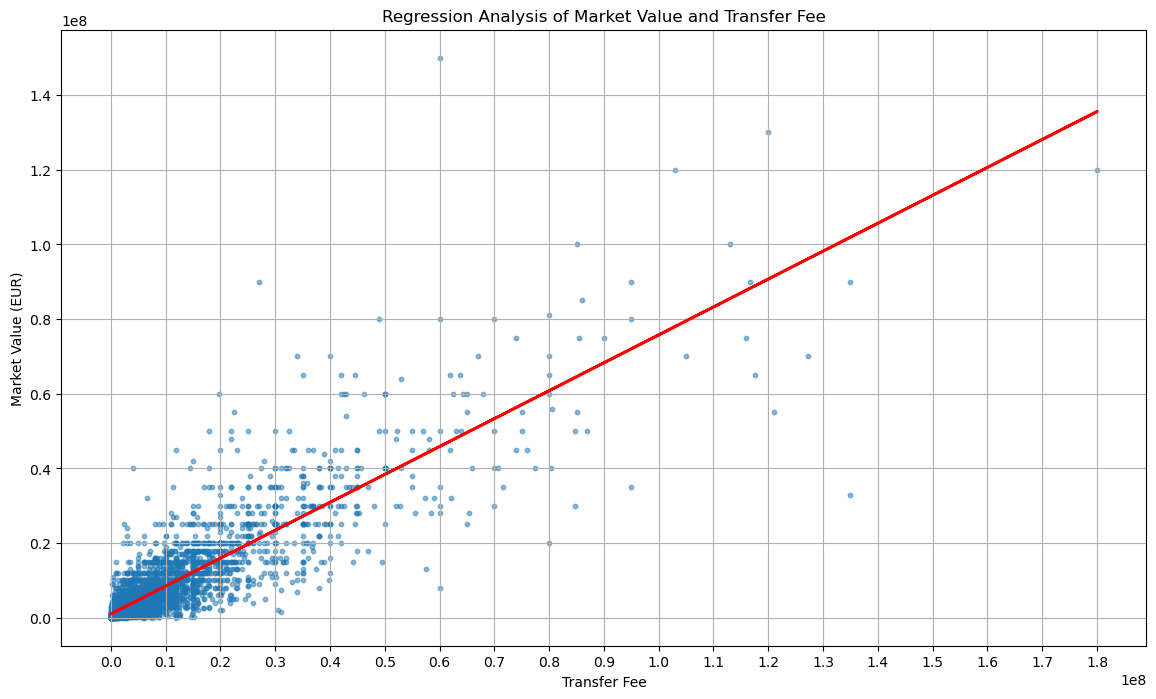

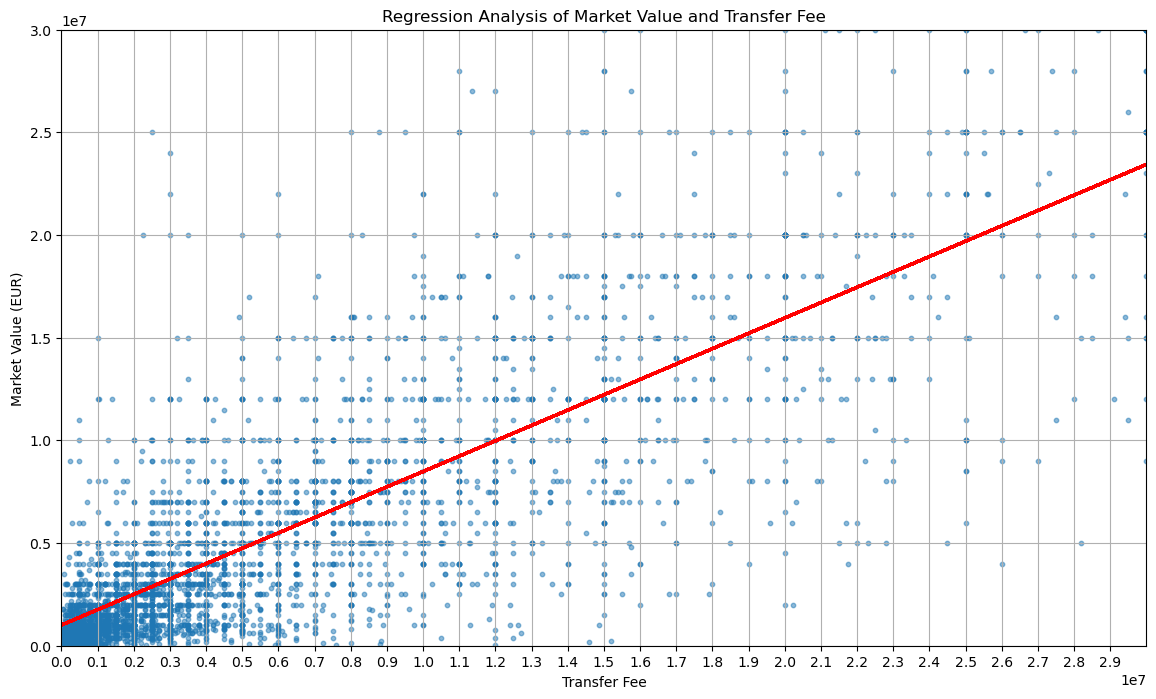

                              OLS Regression Results                             
Dep. Variable:     market_value_in_eur_y   R-squared:                       0.755
Model:                               OLS   Adj. R-squared:                  0.755
Method:                    Least Squares   F-statistic:                 1.627e+04
Date:                   Thu, 22 Aug 2024   Prob (F-statistic):               0.00
Time:                           11:07:51   Log-Likelihood:                -89529.
No. Observations:                   5292   AIC:                         1.791e+05
Df Residuals:                       5290   BIC:                         1.791e+05
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.00

In [349]:
# Regression analysis TM vs transfer_fees

mv_tm_regr = merged

mv_tm_regr = mv_tm_regr[mv_tm_regr['market_value_in_eur_y'] != 0]

countries = ["France", "Brazil", "England", "Spain", "Italy", "Germany", "Netherlands", "Argentina",
            "Belgium", "Portugal", "Denmark", "Switzerland", "Austria", "Serbia", "Croatia", "Sweden",
            "Norway", "Scotland","Nigeria", "Senegal", "Ghana", "Cote d'Ivoire", "South Korea",
            "Japan", "Colombia", "Uruguay", "Chile", "Peru", "Ecuador", "Mexico", "Morocco", "Tunisia", 
            "Poland", "Hungary", "Slovenia", "Czech Republic", "Slovakia", "Romania", "Greece", 
            "Turkey", "Russia", "Ukraine"]

mv_tm_regr = mv_tm_regr[mv_tm_regr["country_of_birth"].isin(countries)]

mv_tm_regr = mv_tm_regr.dropna(subset='market_value_in_eur_y')

# Perform regression analysis
X = sm.add_constant(mv_tm_regr['transfer_fee'])
model = sm.OLS(mv_tm_regr['market_value_in_eur_y'], X)
results = model.fit()

# Plot regression line
plt.figure(figsize=(14, 8))
plt.scatter(mv_tm_regr['transfer_fee'], mv_tm_regr['market_value_in_eur_y'], alpha=0.5, s=10)
plt.plot(mv_tm_regr['transfer_fee'], results.predict(X), color='red', linewidth=2)
plt.xlabel('Transfer Fee')
plt.ylabel('Market Value (EUR)')
plt.title('Regression Analysis of Market Value and Transfer Fee')
plt.grid(True)
plt.xticks(np.arange(0, 200000000, step = 10000000))  # Adjust step size as needed
plt.locator_params(axis = 'x', tight=True)
plt.show()
plt.close()

# Plot regression line
plt.figure(figsize=(14, 8))
plt.scatter(mv_tm_regr['transfer_fee'], mv_tm_regr['market_value_in_eur_y'], alpha=0.5, s=10)
plt.plot(mv_tm_regr['transfer_fee'], results.predict(X), color='red', linewidth=2)
plt.xlabel('Transfer Fee')
plt.ylabel('Market Value (EUR)')
plt.title('Regression Analysis of Market Value and Transfer Fee')
plt.grid(True)
plt.xticks(np.arange(0, 30000000, step = 1000000))  # Adjust step size as needed
plt.locator_params(axis = 'x', tight=True)
plt.xlim(0,30000000)
plt.ylim(0,30000000)
plt.show()
plt.close()

print(results.summary())

# R-squared is 0.755 => 76% of the the variability in the dependent variable is explained 
# by the independent variable. This indicates a strong relationship between the two variables.

# F-statistic: The F-statistic is 1.684e+04 with a very low p-value (0.00), indicating that the 
# overall regression model is statistically significant. This suggests that the independent variable 
# (variable) has a statistically significant effect on the dependent variable (value).

# P-values: Both coefficients have p-values less than 0.05, indicating that they are statistically 
# significant at the 95% confidence level. This suggests that both the constant term and the 
# independent variable have a significant effect on the dependent variable.

# Interpretataion: The slope of the regression line suggests that transfer fees are aprox 20% higher
# than the market value, meaning buying clubs on average pay a significant premium compared to 
# Transfermarkt's estimate.


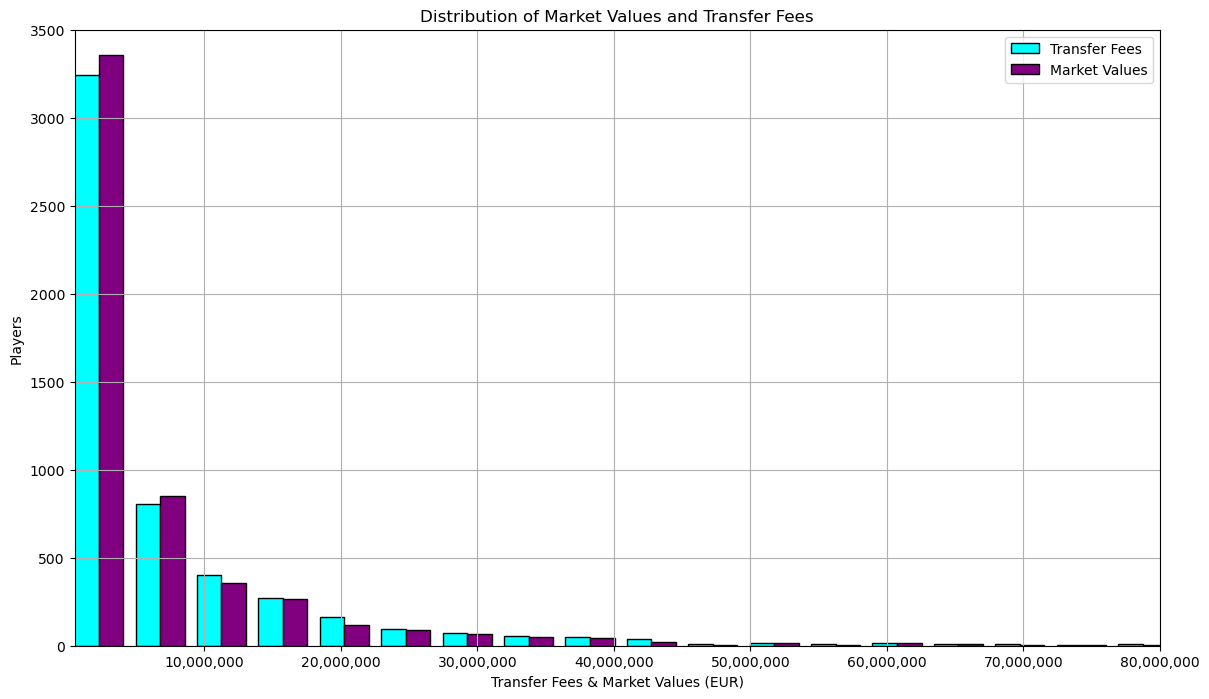

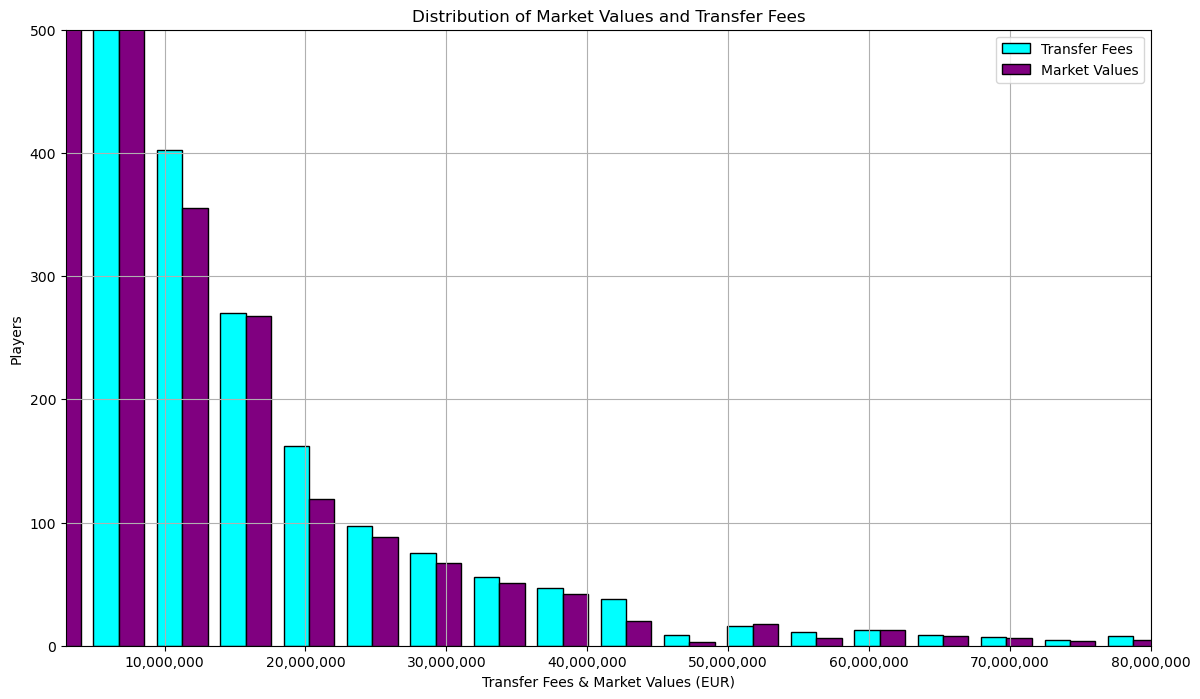

In [581]:
# Histogram

#print(merged)#.head(30))
mv_tm_hist = merged

mv_tm_hist = mv_tm_hist[mv_tm_hist['market_value_in_eur_y'] != 0]

countries = ["France", "Brazil", "England", "Spain", "Italy", "Germany", "Netherlands", "Argentina",
            "Belgium", "Portugal", "Denmark", "Switzerland", "Austria", "Serbia", "Croatia", 
            "Sweden","Norway", "Scotland","Nigeria", "Senegal", "Ghana", "Cote d'Ivoire", 
            "South Korea","Japan", "Colombia", "Uruguay", "Chile", "Peru", "Ecuador", "Mexico", 
            "Morocco", "Tunisia", "Poland", "Hungary", "Slovenia", "Czech Republic", "Slovakia", 
            "Romania", "Greece", "Turkey", "Russia", "Ukraine"]

mv_tm_hist = mv_tm_hist[mv_tm_hist["country_of_birth"].isin(countries)]

mv_tm_hist = mv_tm_hist.dropna(subset='market_value_in_eur_y')

# Plot 
plt.figure(figsize=(14, 8))
# Creating a stacked histogram
plt.hist([mv_tm_hist['transfer_fee'], mv_tm_hist['market_value_in_eur_y']], bins=40, stacked=False, 
         color=['cyan', 'Purple'], edgecolor='black')#, label=['Transfer Fees', "Market Values"])
plt.xlabel('Transfer Fees & Market Values (EUR)')
plt.ylabel('Players')
plt.title('Distribution of Market Values and Transfer Fees')
plt.legend(['Transfer Fees', "Market Values"],loc='best')#, zorder=3)
plt.grid(True)
##plt.xticks(np.arange(0, 30000000, step = 1000000))  # Adjust step size as needed
plt.xlim(500000,80000000)
plt.ylim(0,3500)
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))  
# Display the plot
plt.show()
plt.close()

# Plot 
plt.figure(figsize=(14, 8))
# Creating a stacked histogram
plt.hist([mv_tm_hist['transfer_fee'], mv_tm_hist['market_value_in_eur_y']], bins=40, stacked=False, 
         color=['cyan', 'Purple'], edgecolor='black')#, label=['Transfer Fees', "Market Values"])
plt.xlabel('Transfer Fees & Market Values (EUR)')
plt.ylabel('Players')
plt.title('Distribution of Market Values and Transfer Fees')
plt.legend(['Transfer Fees', "Market Values"],loc='best')#, zorder=3)
plt.grid(True)
##plt.xticks(np.arange(0, 30000000, step = 1000000))  # Adjust step size as needed
plt.xlim(3000000,80000000)
plt.ylim(0,500)
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}')) 
# Display the plot
plt.show()
plt.close()


C:\Users\jonat\AppData\Local\Temp\ipykernel_18760\129243859.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Season_End_Year"] = "20" + df["transfer_season"].str[-2:]


                    Robust linear Model Regression Results                    
Dep. Variable:                     Rk   No. Observations:                  193
Model:                            RLM   Df Residuals:                      191
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 23 Aug 2024                                         
Time:                        18:34:46                                         
No. Iterations:                    13                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           11.4171      0.646     17.679   

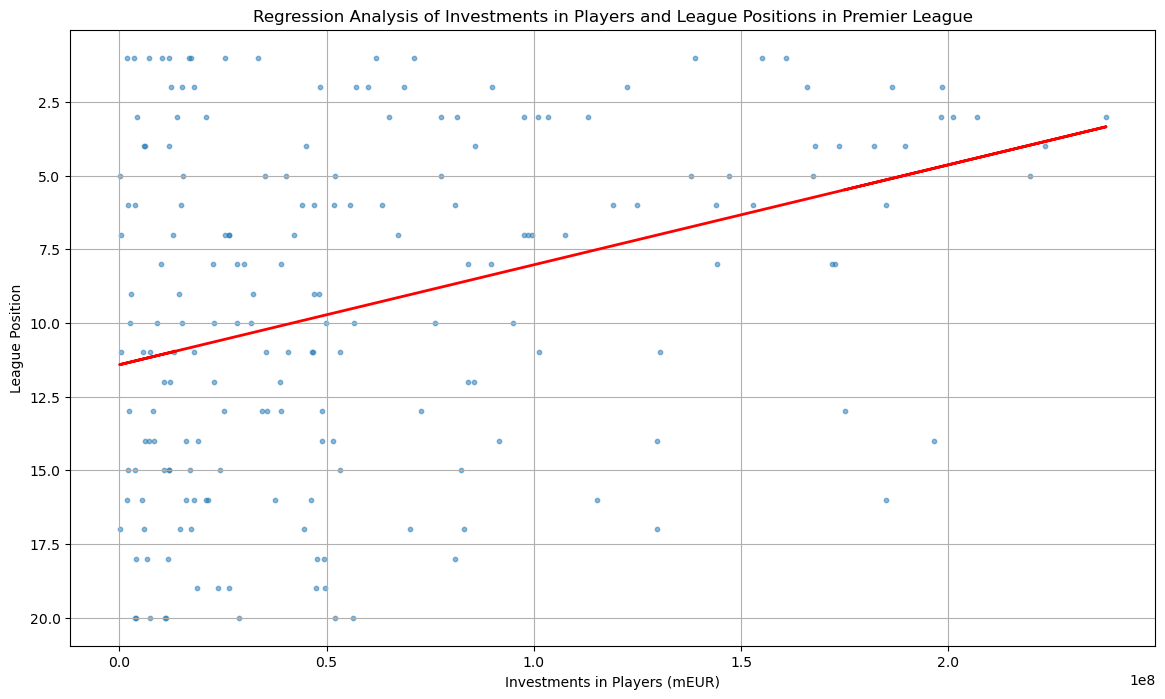

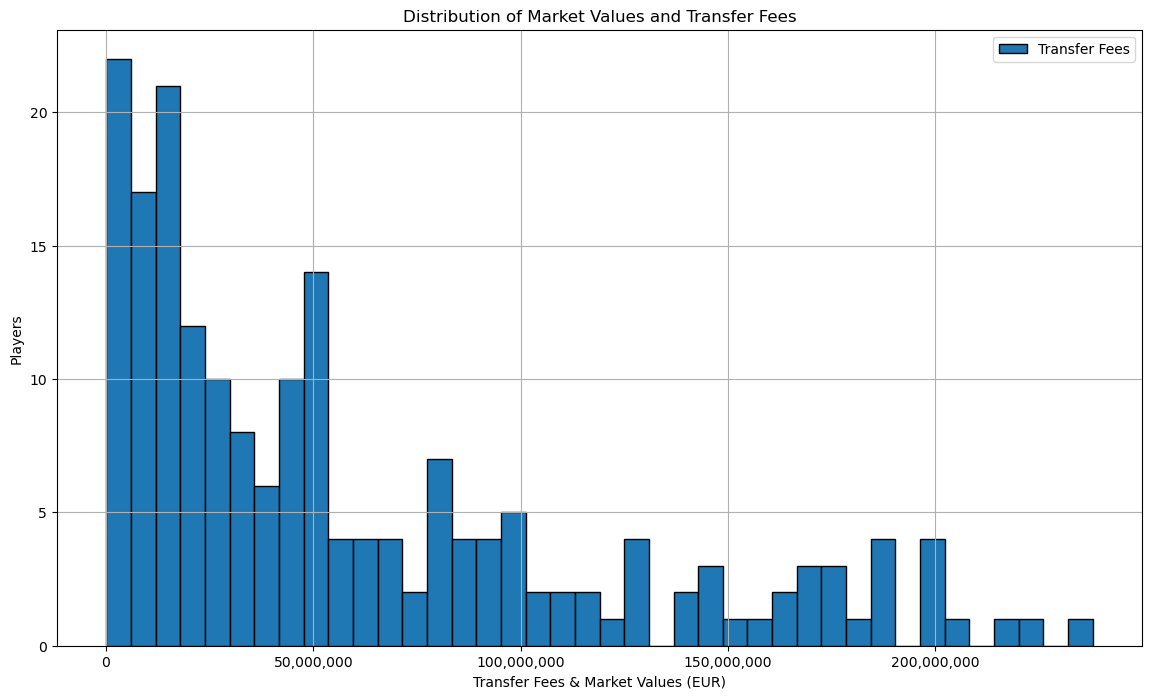

In [586]:
#

premier = pd.read_csv('premier-league-tables.csv')

premier = premier[(premier['Season_End_Year'] > 2006) & (premier['Season_End_Year'] < 2024)]

premier["Team"] = premier["Team"].replace({
    "Nott'ham Forest": "Nottm Forest",
    "Newcastle Utd": "Newcastle",
    "Manchester Utd": "Man Utd",
    "Manchester City": "Man City",
})

premier = premier.rename(columns = {"Team": "to_club_name"})
to_keep = ["Season_End_Year", "to_club_name", "Rk", "Notes"]
premier = premier[to_keep]

premier["Season_End_Year"] = premier["Season_End_Year"].astype(str)
premier["key"] = premier["Season_End_Year"] + premier["to_club_name"]

pl_teams = ['Watford', 'Burnley', 'Fulham', 'Southampton', 'Crystal Palace', 'Nottm Forest', 
            'Brighton', 'Leicester', 'Bournemouth', 'Wolves', 'Aston Villa', 'Everton', 'Newcastle', 
            'West Ham', 'Liverpool', 'Tottenham', 'Arsenal', 'Man Utd', 'Man City', 'Chelsea']

transfers_club_ranking_pl = pd.read_csv("transfers_club_ranking_pl.csv")

def transfers_country(league_id):
    
    df = transfers_club_ranking_pl[transfers_club_ranking_pl["domestic_competition_id"] == league_id]
    
    # Correct the creation of 'Season_End_Year' by slicing and concatenating
    df["Season_End_Year"] = "20" + df["transfer_season"].str[-2:]
    
    df = df.groupby(["Season_End_Year","to_club_name"])["transfer_fee"].agg(
        transfer_sum = 'sum').reset_index()
    
    df["key"] = df["Season_End_Year"] + df["to_club_name"]
    
    return df

england = transfers_country("GB1")

england = pd.merge(england, premier, on = "key", how = "left")

england = england[ ~ england.Season_End_Year_x.str.contains("2024")]
###print(england)

to_keep = ["transfer_sum", "Rk"]
england = england[to_keep]

# Drop rows with any NaNs
england = england.dropna()

# Detect and possibly remove extreme outliers
z_scores = np.abs(stats.zscore(england['transfer_sum']))
england = england[(z_scores < 3)]  # Keeping only rows with z-scores less than 3

# Add a constant to the independent variable for the intercept
X = sm.add_constant(england['transfer_sum'])
y = england['Rk']

# Fit a robust linear model
model = sm.RLM(y, X).fit()

# Print the summary of the regression results
print(model.summary())

# Plot regression line
fig, ax = plt.subplots(figsize=(14, 8)) 
ax.scatter(england['transfer_sum'], england['Rk'], alpha=0.5, s=10)
ax.plot(england['transfer_sum'], model.predict(X), color='red', linewidth=2)
ax.set_xlabel('Investments in Players (mEUR)')
ax.set_ylabel('League Position')
ax.set_title('Regression Analysis of Investments in Players and League Positions in Premier League')
ax.grid(True)
#plt.xticks(np.arange(0, 200000000, step = 10000000))  # Adjust step size as needed
ax.locator_params(axis = 'x', tight=True)

# Invert the y-axis on the axes object
ax.invert_yaxis()
plt.show()
plt.close()

# Analysis:
# The model indicates a statistically significant relationship between the transfer sum in a given 
# and the end of season rank, suggesting that larger investments (or bigger transfer sums) are 
# associated with a higher league position, reaffirming the common perception that the balance 
# sheet matters in modern football. However, the analysis also suggests that with no investments, 
# a club can expect a 11th-12th place.
# The regression line slope suggests that for every 100.000.000 EUR spent in a given season,
# a club can expect to advance ~3.5 positions.

################################################ Relegated and not in PL

# england
plt.figure(figsize=(14, 8))
# Creating a stacked histogram
plt.hist([england['transfer_sum']], bins=40, stacked=False, edgecolor='black')#color=['cyan', 'Purple']
plt.xlabel('Transfer Fees & Market Values (EUR)')
plt.ylabel('Players')
plt.title('Distribution of Market Values and Transfer Fees')
plt.legend(['Transfer Fees', "Market Values"],loc='best')#, zorder=3)
plt.grid(True)
##plt.xticks(np.arange(0, 30000000, step = 1000000))  # Adjust step size as needed
#plt.xlim(3000000,80000000)
#plt.ylim(0,500)
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}')) 
# Display the plot
plt.show()
plt.close()
